# Predict Wind Speed with Mavic Data

In [403]:
# load relavent package

import pandas as pd
import numpy as np
import tensorflow as tf
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import matplotlib.gridspec as gridspec

## Load Data

In [261]:
WIND_DATA_URL = "https://raw.githubusercontent.com/SophiaCheung1211/Using_Drone_to_Predict_Wind_Speed/master/Wind_Data/Mavic/sonic_anemometer_march26.csv"
WIND_TRUNCATED_SOLO_URL =  "https://raw.githubusercontent.com/SophiaCheung1211/Using_Drone_to_Predict_Wind_Speed/master/Wind_Data/SOLO/truncated_solo_wind.csv"
WIND_TRUNCATED_MAVIC_URL = "https://raw.githubusercontent.com/SophiaCheung1211/Using_Drone_to_Predict_Wind_Speed/master/Wind_Data/Mavic/truncated_mavic_wind.csv"
MAVIC_FLIGHT1_URL = "https://raw.githubusercontent.com/SophiaCheung1211/Using_Drone_to_Predict_Wind_Speed/master/Drone_Data/Mavic/mavic_march26_flight1.csv"
MAVIC_FLIGHT2_URL = "https://raw.githubusercontent.com/SophiaCheung1211/Using_Drone_to_Predict_Wind_Speed/master/Drone_Data/Mavic/mavic_march26_flight2.csv"
MAVIC_FLIGHT3_URL = "https://raw.githubusercontent.com/SophiaCheung1211/Using_Drone_to_Predict_Wind_Speed/master/Drone_Data/Mavic/mavic_march26_flight3.csv"
MAVIC_FLIGHT_CONCAT_URL = "https://raw.githubusercontent.com/SophiaCheung1211/Using_Drone_to_Predict_Wind_Speed/master/Drone_Data/Mavic/concatenated_mavic.csv"
SOLO_FLIGHT_CONCAT_URL = "https://raw.githubusercontent.com/SophiaCheung1211/Using_Drone_to_Predict_Wind_Speed/master/Drone_Data/SOLO/concatenated_solo.csv"
wind_data = pd.read_csv(WIND_DATA_URL)
wind_truncated_mavic = pd.read_csv(WIND_TRUNCATED_MAVIC_URL)
wind_truncated_solo = pd.read_csv(WIND_TRUNCATED_SOLO_URL)
mavic_flight1 = pd.read_csv(MAVIC_FLIGHT1_URL)
mavic_flight2 = pd.read_csv(MAVIC_FLIGHT2_URL)
mavic_flight3 = pd.read_csv(MAVIC_FLIGHT3_URL)
mavic_concat = pd.read_csv(MAVIC_FLIGHT_CONCAT_URL)
solo_concat = pd.read_csv(SOLO_FLIGHT_CONCAT_URL)

EQUAL_MAVIC_URL = "https://raw.githubusercontent.com/SophiaCheung1211/Using_Drone_to_Predict_Wind_Speed/master/Equal_Length_Data/LF-concatenated_mav.csv"
EQUAL_SOLO_URL = "https://raw.githubusercontent.com/SophiaCheung1211/Using_Drone_to_Predict_Wind_Speed/master/Equal_Length_Data/LF-concatenated_solo.csv"
EQUAL_WIND_URL = "https://raw.githubusercontent.com/SophiaCheung1211/Using_Drone_to_Predict_Wind_Speed/master/Equal_Length_Data/LF-truncated_wind.csv"
mavic_concat = pd.read_csv(EQUAL_MAVIC_URL)
solo_concat = pd.read_csv(EQUAL_SOLO_URL)
wind = pd.read_csv(EQUAL_WIND_URL)


In [262]:
wind_truncated_mavic = wind_truncated_mavic.drop(columns=['index'])
wind_truncated_solo = wind_truncated_solo.drop(columns=['index'])

In [263]:
wind = wind.drop(columns=['index'])

In [264]:
solo_concat

,index,solo_roll,solo_pitch,solo_tilt,solo_acc_x,solo_acc_y,solo_acc_z
0,0,2.520000,4.266667,4.972217,0.795420,-0.426810,-9.919106
1,1,2.585000,4.035000,4.791754,0.706003,-0.456654,-9.986795
2,2,2.733333,4.073333,4.909501,0.806733,-0.347283,-9.887735
3,3,1.790000,4.080000,4.455134,0.675360,-0.403155,-9.741537
4,4,2.723333,3.956667,4.806938,0.763407,-0.403770,-9.770672
...,...,...,...,...,...,...,...
2216,2216,2.036667,2.326667,3.126845,0.603815,-0.316865,-9.958909
2217,2217,1.645000,2.980000,3.479374,0.498798,-0.429512,-9.949614
2218,2218,3.603333,2.040000,4.142569,0.565965,-0.460122,-10.014454
2219,2219,2.910000,2.105000,3.623510,0.337627,-0.437382,-10.344625


In [265]:
mavic_concat = mavic_concat.drop(columns=['index'])
solo_concat = solo_concat.drop(columns=['index'])

In [266]:
solo_concat = solo_concat.iloc[:,:5]
solo_concat

,solo_roll,solo_pitch,solo_tilt,solo_acc_x,solo_acc_y
0,2.520000,4.266667,4.972217,0.795420,-0.426810
1,2.585000,4.035000,4.791754,0.706003,-0.456654
2,2.733333,4.073333,4.909501,0.806733,-0.347283
3,1.790000,4.080000,4.455134,0.675360,-0.403155
4,2.723333,3.956667,4.806938,0.763407,-0.403770
...,...,...,...,...,...
2216,2.036667,2.326667,3.126845,0.603815,-0.316865
2217,1.645000,2.980000,3.479374,0.498798,-0.429512
2218,3.603333,2.040000,4.142569,0.565965,-0.460122
2219,2.910000,2.105000,3.623510,0.337627,-0.437382


In [267]:
mavic_concat = mavic_concat.iloc[:,:5]
mavic_concat

,mav_roll,mav_pitch,mav_tilt,mav_acc_x,mav_acc_y
0,2.171723,5.056454,5.501987,0.090618,-0.036859
1,2.062102,5.418120,5.796172,0.095688,-0.033277
2,1.818813,5.834557,6.110539,0.098315,-0.036174
3,2.427100,5.414267,5.931910,0.093983,-0.039623
4,2.285227,5.380641,5.844501,0.092391,-0.040307
...,...,...,...,...,...
2216,1.881313,4.913622,5.260640,0.092989,-0.047239
2217,2.428385,3.988813,4.668849,0.077576,-0.038165
2218,3.666743,4.168956,5.549906,0.086782,-0.049995
2219,2.454890,5.974841,6.457813,0.090419,-0.056244


In [348]:
scaler = MinMaxScaler(feature_range=(0, 1))
mavic_scaled = scaler.fit_transform(mavic_concat)
solo_scaled = scaler.fit_transform(solo_concat)
wind_scaled = scaler.fit_transform(wind)

In [349]:
mavic_scaled.shape

(2221, 5)

In [350]:
solo_scaled.shape

(2221, 5)

In [351]:
wind_truncated_mavic.shape

(2339, 1)

## Prepare Data for LSTM

### Reshape The Data

In [467]:
LAG_OBSERVATIONS_SIZE = 40
PREDICT_SIZE = 1

In [468]:
def DataPrepare(data, lag_obs=2, n_output=5):
    prepared_data = []
    for i in range(len(data) - lag_obs - n_output + 1):
        prepared_data.append(np.array(data[i:i + lag_obs]))
    return np.array(prepared_data)

def LabelPrepare(data, lag_obs=2, n_output=5):
    prepared_label = []
    for i in range((0 + lag_obs), (len(data) - n_output + 1)):
        tmp = []
        for j in range(i, i + n_output):
            tmp.append(float(data[j]))
        prepared_label.append(np.array(tmp))       
    return np.array(prepared_label)

In [472]:
# mavic data
mavic_prepared = DataPrepare(mavic_scaled, LAG_OBSERVATIONS_SIZE, PREDICT_SIZE)
#mavic_prepared = DataPrepare(np.array(mavic_concat), LAG_OBSERVATIONS_SIZE, PREDICT_SIZE)
# solo data
solo_prepared = DataPrepare(solo_scaled, LAG_OBSERVATIONS_SIZE, PREDICT_SIZE)
#solo_prepared = DataPrepare(np.array(solo_concat), LAG_OBSERVATIONS_SIZE, PREDICT_SIZE)
# wind data
wind_mavic_prepared = LabelPrepare(np.array(wind), LAG_OBSERVATIONS_SIZE, PREDICT_SIZE)
#wind_solo_prepared = LabelPrepare(np.array(wind), LAG_OBSERVATIONS_SIZE, PREDICT_SIZE)
wind_solo_prepared = LabelPrepare(wind_scaled, LAG_OBSERVATIONS_SIZE, PREDICT_SIZE)

In [473]:
mavic_prepared.shape

(2181, 40, 5)

In [474]:
wind_mavic_prepared.shape

(2181, 1)

In [475]:
solo_prepared.shape

(2181, 40, 5)

In [476]:
wind_solo_prepared.shape

(2181, 1)

In [477]:
wind_truncated_solo

,windspeed
0,0.790670
1,1.120466
2,1.836090
3,1.397597
4,1.356768
...,...
2767,3.275213
2768,3.234731
2769,3.200534
2770,3.265304


### Split Test and Train Set 

In [478]:
# Ratio
mavic_index = int(len(mavic_prepared) * 0.8)
mavic_val_index = int(mavic_index*0.9)

solo_index = int(len(solo_prepared) * 0.8)
solo_val_index = int(solo_index*0.9)

In [479]:
# all data 
X_train_mavic, X_test_mavic = mavic_prepared[:mavic_index], mavic_prepared[mavic_index:]
y_train_mavic, y_test_mavic = wind_mavic_prepared[:mavic_index], wind_mavic_prepared[mavic_index:]

# X_train_mavic, X_val_mavic = X_train_mavic_tmp[:mavic_val_index], X_train_mavic_tmp[mavic_val_index:]
# y_train_mavic, y_val_mavic = y_train_mavic_tmp[:mavic_val_index], y_train_mavic_tmp[mavic_val_index:]

X_train_solo, X_test_solo = solo_prepared[:solo_index], solo_prepared[solo_index:]
y_train_solo, y_test_solo = wind_solo_prepared[:solo_index], wind_solo_prepared[solo_index:]

# X_train_solo, X_val_solo = X_train_solo_tmp[:solo_val_index], X_train_solo_tmp[solo_val_index:]
# y_train_solo, y_val_solo = y_train_solo_tmp[:solo_val_index], y_train_solo_tmp[solo_val_index:]

In [480]:
X_train_mavic.shape

(1744, 40, 5)

In [461]:
X_test_solo.shape

(437, 40, 5)

In [481]:
y_test_mavic.shape

(437, 1)

# Number of Layers and Neurons

## Model1 

In [173]:
numPoints, numFeatures = 40, 5

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.LSTM(128, return_sequences=True, input_shape=(numPoints, numFeatures)))
model.add(tf.keras.layers.Dropout(rate=0.2))
model.add(tf.keras.layers.LSTM(64, return_sequences=True))
model.add(tf.keras.layers.Dropout(rate=0.2))
model.add(tf.keras.layers.LSTM(32, activation='relu'))
model.add(tf.keras.layers.Dense(5))

optimizer=tf.keras.optimizers.RMSprop(lr=0.001, rho=0.9)

model.compile(
        optimizer=optimizer, 
        loss='mse',
        metrics = ["accuracy"])

In [174]:
history = model.fit(X_train_solo, y_train_solo, epochs = 50)

Epoch 1/50
1741/1741 [==============================] - 9s 5ms/sample - loss: 15.6088 - acc: 0.2453
Epoch 2/50
1741/1741 [==============================] - 8s 4ms/sample - loss: 1.7570 - acc: 0.2188
Epoch 3/50
1741/1741 [==============================] - 8s 4ms/sample - loss: 1.7653 - acc: 0.1947
Epoch 4/50
1741/1741 [==============================] - 8s 4ms/sample - loss: 1.4310 - acc: 0.2108
Epoch 5/50
1741/1741 [==============================] - 8s 4ms/sample - loss: 1.1682 - acc: 0.2016
Epoch 6/50
1741/1741 [==============================] - 8s 4ms/sample - loss: 0.9789 - acc: 0.2188
Epoch 7/50
1741/1741 [==============================] - 8s 4ms/sample - loss: 0.9085 - acc: 0.2074
Epoch 8/50
1741/1741 [==============================] - 8s 4ms/sample - loss: 0.8250 - acc: 0.1924
Epoch 9/50
1741/1741 [==============================] - 8s 4ms/sample - loss: 0.7952 - acc: 0.2028
Epoch 10/50
1741/1741 [==============================] - 8s 5ms/sample - loss: 0.7367 - acc: 0.2137
Epoch 11

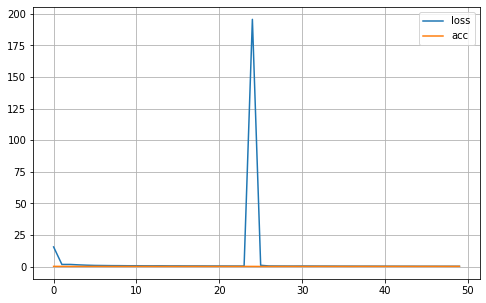

In [175]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
# plt.gca().set_ylim(0, 0.2)
plt.show()

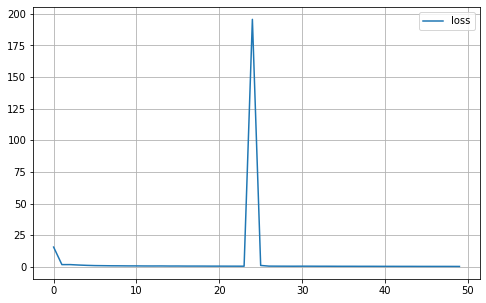

In [179]:
pd.DataFrame(history.history['loss'], columns=['loss']).plot(figsize=(8, 5))
plt.grid(True)
# plt.gca().set_ylim(0, 0.2)
plt.show()

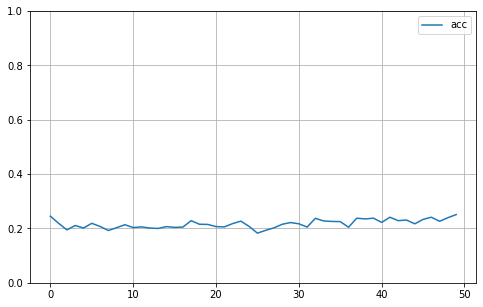

In [180]:
pd.DataFrame(history.history['acc'], columns=['acc']).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [182]:
pred1_raw = model.predict(X_test_solo)

pred1 = []
for row in pred1_raw:
    pred1.append(row[0])
pred1 = np.array(pred1).reshape(-1,1)

In [183]:
y_test1 = []
for row in y_test_solo:
    y_test1.append(row[0])
y_test1 = np.array(y_test1).reshape(-1,1)
y_test1.shape

(436, 1)

In [190]:
y_train1 = []
for row in y_train_solo:
    y_train1.append(row[0])
y_train1 = np.array(y_train1).reshape(-1,1)
y_train1.shape

(1741, 1)

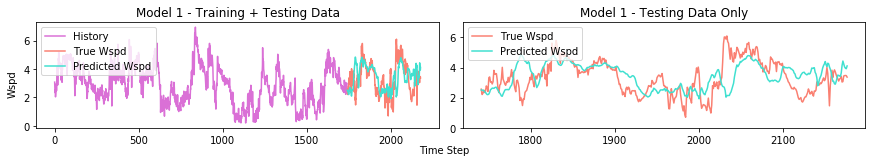

In [423]:
Title = "Model 1"
time = [i for i in range(2177)]

fig = plt.figure(figsize=(12, 2))
gs = gridspec.GridSpec(1, 2, width_ratios=[1, 1])
ax0 = plt.subplot(gs[0])
ax1 = plt.subplot(gs[1])

axes = [ax0, ax1]


a = plt.gca()
a.set_ylim([0, 7])        
       
axes[0].plot(time[:1741], y_train1, label='History', color='orchid')
axes[0].plot(time[1741:], y_test1, label='True Wspd', color='salmon')
axes[0].plot(time[1741:], pred1, label='Predicted Wspd', color='turquoise')
       
axes[1].plot(time[1741:], y_test1, label='True Wspd', color='salmon')
axes[1].plot(time[1741:], pred1, label='Predicted Wspd', color='turquoise')
       
fig.tight_layout()
       
# Set labels
fig.text(0.5, 0.04, 'Time Step', ha='center', va='center')
fig.text(0, 0.5, 'Wspd', ha='center', va='center', rotation='vertical')

axes[0].set_title(Title + " - Training + Testing Data")
axes[1].set_title(Title + " - Testing Data Only")

ax0.legend(loc="upper left")
ax1.legend(loc="upper left")
plt.show()
plt.close()

## Model2 

In [201]:
numPoints, numFeatures = 40, 5

model2 = tf.keras.models.Sequential()
model2.add(tf.keras.layers.LSTM(256, return_sequences=True, input_shape=(numPoints, numFeatures)))
model2.add(tf.keras.layers.Dropout(rate=0.2))
model2.add(tf.keras.layers.LSTM(128, return_sequences=True))
model2.add(tf.keras.layers.Dropout(rate=0.2))
model2.add(tf.keras.layers.LSTM(64, return_sequences=True))
model2.add(tf.keras.layers.Dropout(rate=0.2))
model2.add(tf.keras.layers.LSTM(32, activation='relu'))
model2.add(tf.keras.layers.Dense(5))

optimizer=tf.keras.optimizers.RMSprop(lr=0.001, rho=0.9)

model2.compile(
        optimizer=optimizer, 
        loss='mse',
        metrics = ["accuracy"])

In [202]:
history2 = model2.fit(X_train_solo, y_train_solo, epochs = 50)

Epoch 1/50
1741/1741 [==============================] - 26s 15ms/sample - loss: 3.2658 - acc: 0.2119
Epoch 2/50
1741/1741 [==============================] - 24s 14ms/sample - loss: 1.8284 - acc: 0.2079
Epoch 3/50
1741/1741 [==============================] - 24s 14ms/sample - loss: 1.7621 - acc: 0.2142
Epoch 4/50
1741/1741 [==============================] - 24s 14ms/sample - loss: 1.5113 - acc: 0.2016
Epoch 5/50
1741/1741 [==============================] - 24s 14ms/sample - loss: 1.1437 - acc: 0.2234
Epoch 6/50
1741/1741 [==============================] - 24s 14ms/sample - loss: 0.9103 - acc: 0.2177
Epoch 7/50
1741/1741 [==============================] - 24s 14ms/sample - loss: 3.6647 - acc: 0.2028
Epoch 8/50
1741/1741 [==============================] - 25s 14ms/sample - loss: 0.6918 - acc: 0.1970
Epoch 9/50
1741/1741 [==============================] - 24s 14ms/sample - loss: 0.7350 - acc: 0.2051
Epoch 10/50
1741/1741 [==============================] - 25s 14ms/sample - loss: 0.7585 - a

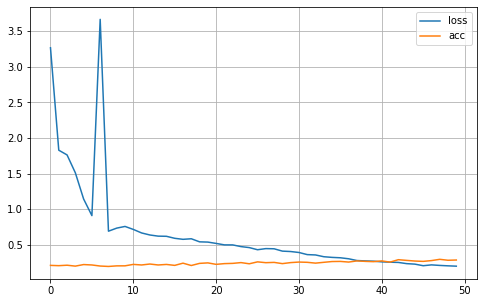

In [203]:
pd.DataFrame(history2.history).plot(figsize=(8, 5))
plt.grid(True)
# plt.gca().set_ylim(0, 0.2)
plt.show()

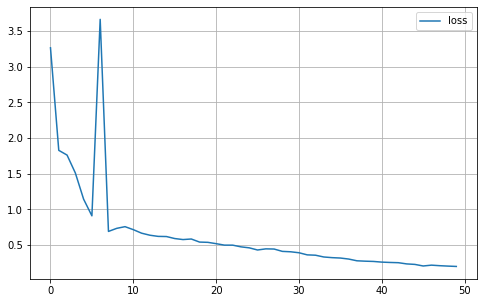

In [204]:
pd.DataFrame(history2.history['loss'], columns=['loss']).plot(figsize=(8, 5))
plt.grid(True)
# plt.gca().set_ylim(0, 0.2)
plt.show()

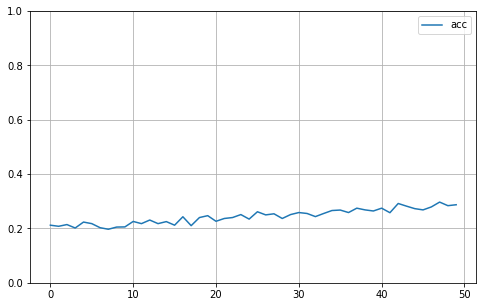

In [205]:
pd.DataFrame(history2.history['acc'], columns=['acc']).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [206]:
pred2_raw = model2.predict(X_test_solo)

pred2 = []
for row in pred2_raw:
    pred2.append(row[0])
pred2 = np.array(pred2).reshape(-1,1)
pred2.shape

(436, 1)

In [207]:
y_test_mavic.shape

(436, 5)

In [208]:
y_test2 = []
for row in y_test_solo:
    y_test2.append(row[0])
y_test2 = np.array(y_test2).reshape(-1,1)
y_test2.shape

(436, 1)

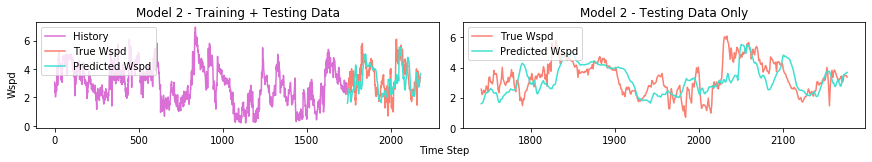

In [422]:
Title = "Model 2"
time = [i for i in range(2177)]

fig = plt.figure(figsize=(12, 2))
gs = gridspec.GridSpec(1, 2, width_ratios=[1, 1])
ax0 = plt.subplot(gs[0])
ax1 = plt.subplot(gs[1])

axes = [ax0, ax1]


a = plt.gca()
a.set_ylim([0, 7])        
       
axes[0].plot(time[:1741], y_train1, label='History', color='orchid')
axes[0].plot(time[1741:], y_test2, label='True Wspd', color='salmon')
axes[0].plot(time[1741:], pred2, label='Predicted Wspd', color='turquoise')
       
axes[1].plot(time[1741:], y_test2, label='True Wspd', color='salmon')
axes[1].plot(time[1741:], pred2, label='Predicted Wspd', color='turquoise')
       
fig.tight_layout()
       
# Set labels
fig.text(0.5, 0.04, 'Time Step', ha='center', va='center')
fig.text(0, 0.5, 'Wspd', ha='center', va='center', rotation='vertical')

axes[0].set_title(Title + " - Training + Testing Data")
axes[1].set_title(Title + " - Testing Data Only")

ax0.legend(loc="upper left")
ax1.legend(loc="upper left")
plt.show()
plt.close()

## Model 3 

In [214]:
numPoints, numFeatures = 40, 5

model3 = tf.keras.models.Sequential()
model3.add(tf.keras.layers.LSTM(512, return_sequences=True, input_shape=(numPoints, numFeatures)))
model3.add(tf.keras.layers.Dropout(rate=0.2))
model3.add(tf.keras.layers.LSTM(256, return_sequences=True))
model3.add(tf.keras.layers.Dropout(rate=0.2))
model3.add(tf.keras.layers.LSTM(128, return_sequences=True))
model3.add(tf.keras.layers.Dropout(rate=0.2))
model3.add(tf.keras.layers.LSTM(64, return_sequences=True))
model3.add(tf.keras.layers.Dropout(rate=0.2))
model3.add(tf.keras.layers.LSTM(32, activation='relu'))
model3.add(tf.keras.layers.Dense(5))

optimizer=tf.keras.optimizers.RMSprop(lr=0.001, rho=0.9)

model3.compile(
        optimizer=optimizer, 
        loss='mse',
        metrics = ["accuracy"])

In [215]:
history3 = model3.fit(X_train_solo, y_train_solo, epochs = 50)

Epoch 1/50
1741/1741 [==============================] - 63s 36ms/sample - loss: 21.8203 - acc: 0.2183
Epoch 2/50
1741/1741 [==============================] - 61s 35ms/sample - loss: 2.1891 - acc: 0.2051
Epoch 3/50
1741/1741 [==============================] - 62s 36ms/sample - loss: 2.3537 - acc: 0.2200
Epoch 4/50
1741/1741 [==============================] - 62s 35ms/sample - loss: 2.0856 - acc: 0.1959
Epoch 5/50
1741/1741 [==============================] - 62s 36ms/sample - loss: 1.7996 - acc: 0.1850
Epoch 6/50
1741/1741 [==============================] - 62s 36ms/sample - loss: 1.6608 - acc: 0.1878
Epoch 7/50
1741/1741 [==============================] - 62s 36ms/sample - loss: 1.7734 - acc: 0.2005
Epoch 8/50
1741/1741 [==============================] - 62s 36ms/sample - loss: 1.7690 - acc: 0.1895
Epoch 9/50
1741/1741 [==============================] - 62s 35ms/sample - loss: 1.5259 - acc: 0.1614
Epoch 10/50
1741/1741 [==============================] - 62s 36ms/sample - loss: 1.0431 - 

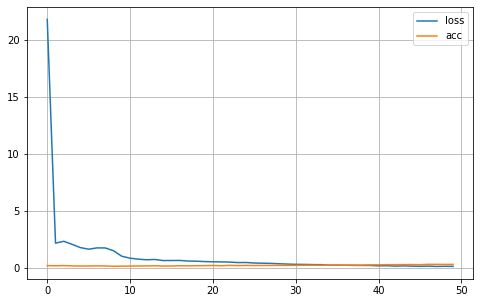

In [216]:
pd.DataFrame(history3.history).plot(figsize=(8, 5))
plt.grid(True)
# plt.gca().set_ylim(0, 0.2)
plt.show()

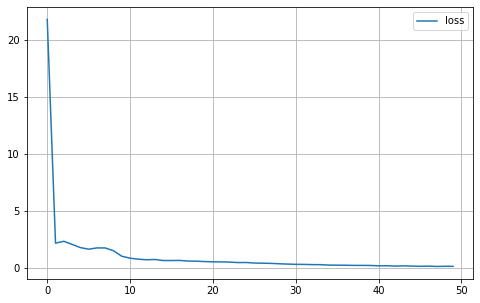

In [217]:
pd.DataFrame(history3.history['loss'], columns=['loss']).plot(figsize=(8, 5))
plt.grid(True)
# plt.gca().set_ylim(0, 0.2)
plt.show()

In [219]:
pred3_raw = model3.predict(X_test_solo)

pred3 = []
for row in pred3_raw:
    pred3.append(row[0])
pred3 = np.array(pred3).reshape(-1,1)
pred3.shape

(436, 1)

In [220]:
y_test3 = []
for row in y_test_solo:
    y_test3.append(row[0])
y_test3 = np.array(y_test3).reshape(-1,1)
y_test3.shape

(436, 1)

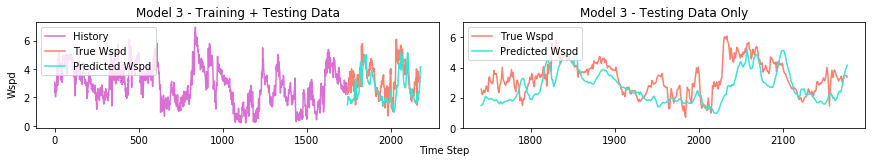

In [421]:
Title = "Model 3"
time = [i for i in range(2177)]

fig = plt.figure(figsize=(12, 2))
gs = gridspec.GridSpec(1, 2, width_ratios=[1, 1])
ax0 = plt.subplot(gs[0])
ax1 = plt.subplot(gs[1])

axes = [ax0, ax1]


a = plt.gca()
a.set_ylim([0, 7])        
       
axes[0].plot(time[:1741], y_train1, label='History', color='orchid')
axes[0].plot(time[1741:], y_test3, label='True Wspd', color='salmon')
axes[0].plot(time[1741:], pred3, label='Predicted Wspd', color='turquoise')
       
axes[1].plot(time[1741:], y_test3, label='True Wspd', color='salmon')
axes[1].plot(time[1741:], pred3, label='Predicted Wspd', color='turquoise')
       
fig.tight_layout()
       
# Set labels
fig.text(0.5, 0.04, 'Time Step', ha='center', va='center')
fig.text(0, 0.5, 'Wspd', ha='center', va='center', rotation='vertical')

axes[0].set_title(Title + " - Training + Testing Data")
axes[1].set_title(Title + " - Testing Data Only")

ax0.legend(loc="upper left")
ax1.legend(loc="upper left")
plt.show()
plt.close()

# Activation Function and Optimizer

## Model 4

In [230]:
numPoints, numFeatures = 40, 5

model4 = tf.keras.models.Sequential()
model4.add(tf.keras.layers.LSTM(256, return_sequences=True, input_shape=(numPoints, numFeatures)))
model4.add(tf.keras.layers.Dropout(rate=0.2))
model4.add(tf.keras.layers.LSTM(128, return_sequences=True))
model4.add(tf.keras.layers.Dropout(rate=0.2))
model4.add(tf.keras.layers.LSTM(64, activation='relu'))
model4.add(tf.keras.layers.Dense(5))

# optimizer=tf.keras.optimizers.RMSprop(lr=0.001, rho=0.9)

model4.compile(
        optimizer='adam',
        loss = 'mse',
        metrics = ["accuracy"])

In [231]:
history4 = model4.fit(X_train_solo, y_train_solo, epochs = 50)

Epoch 1/50
1741/1741 [==============================] - 36s 20ms/sample - loss: 6.0193 - acc: 0.2246
Epoch 2/50
1741/1741 [==============================] - 34s 19ms/sample - loss: 1.1442 - acc: 0.1861
Epoch 3/50
1741/1741 [==============================] - 34s 20ms/sample - loss: 0.9567 - acc: 0.2051
Epoch 4/50
1741/1741 [==============================] - 34s 20ms/sample - loss: 0.8908 - acc: 0.2137
Epoch 5/50
1741/1741 [==============================] - 34s 20ms/sample - loss: 0.8708 - acc: 0.2177
Epoch 6/50
1741/1741 [==============================] - 34s 20ms/sample - loss: 0.8312 - acc: 0.2068
Epoch 7/50
1741/1741 [==============================] - 34s 20ms/sample - loss: 0.7910 - acc: 0.1861
Epoch 8/50
1741/1741 [==============================] - 34s 20ms/sample - loss: 0.7617 - acc: 0.2091
Epoch 9/50
1741/1741 [==============================] - 34s 20ms/sample - loss: 0.7592 - acc: 0.2056
Epoch 10/50
1741/1741 [==============================] - 36s 20ms/sample - loss: 0.7663 - a

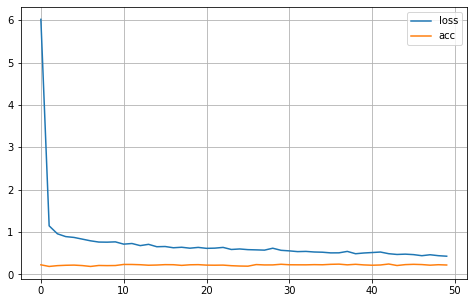

In [232]:
pd.DataFrame(history4.history).plot(figsize=(8, 5))
plt.grid(True)
# plt.gca().set_ylim(0, 0.2)
plt.show()

In [234]:
pred4_raw = model4.predict(X_test_solo)

pred4 = []
for row in pred4_raw:
    pred4.append(row[0])
pred4 = np.array(pred4).reshape(-1,1)
pred4.shape

(436, 1)

In [235]:
y_test4 = []
for row in y_test_solo:
    y_test4.append(row[0])
y_test4 = np.array(y_test3).reshape(-1,1)
y_test4.shape

(436, 1)

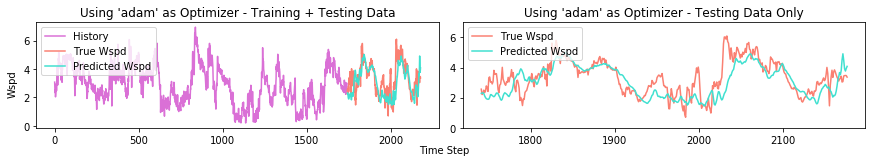

In [418]:
Title = "Using \'adam\' as Optimizer"
time = [i for i in range(2177)]

fig = plt.figure(figsize=(12, 2))
gs = gridspec.GridSpec(1, 2, width_ratios=[1, 1])
ax0 = plt.subplot(gs[0])
ax1 = plt.subplot(gs[1])

axes = [ax0, ax1]


a = plt.gca()
a.set_ylim([0, 7])        
       
axes[0].plot(time[:1741], y_train1, label='History', color='orchid')
axes[0].plot(time[1741:], y_test4, label='True Wspd', color='salmon')
axes[0].plot(time[1741:], pred4, label='Predicted Wspd', color='turquoise')
       
axes[1].plot(time[1741:], y_test4, label='True Wspd', color='salmon')
axes[1].plot(time[1741:], pred4, label='Predicted Wspd', color='turquoise')
       
fig.tight_layout()
       
# Set labels
fig.text(0.5, 0.04, 'Time Step', ha='center', va='center')
fig.text(0, 0.5, 'Wspd', ha='center', va='center', rotation='vertical')

axes[0].set_title(Title + " - Training + Testing Data")
axes[1].set_title(Title + " - Testing Data Only")

ax0.legend(loc="upper left")
ax1.legend(loc="upper left")
plt.show()
plt.close()

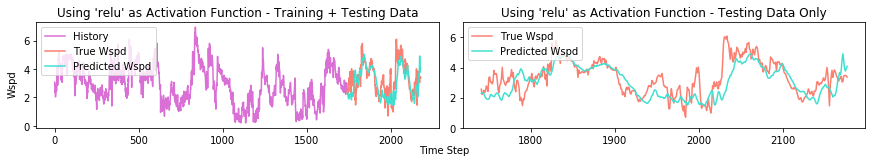

In [424]:
Title = "Using \'relu\' as Activation Function"
time = [i for i in range(2177)]

fig = plt.figure(figsize=(12, 2))
gs = gridspec.GridSpec(1, 2, width_ratios=[1, 1])
ax0 = plt.subplot(gs[0])
ax1 = plt.subplot(gs[1])

axes = [ax0, ax1]


a = plt.gca()
a.set_ylim([0, 7])        
       
axes[0].plot(time[:1741], y_train1, label='History', color='orchid')
axes[0].plot(time[1741:], y_test4, label='True Wspd', color='salmon')
axes[0].plot(time[1741:], pred4, label='Predicted Wspd', color='turquoise')
       
axes[1].plot(time[1741:], y_test4, label='True Wspd', color='salmon')
axes[1].plot(time[1741:], pred4, label='Predicted Wspd', color='turquoise')
       
fig.tight_layout()
       
# Set labels
fig.text(0.5, 0.04, 'Time Step', ha='center', va='center')
fig.text(0, 0.5, 'Wspd', ha='center', va='center', rotation='vertical')

axes[0].set_title(Title + " - Training + Testing Data")
axes[1].set_title(Title + " - Testing Data Only")

ax0.legend(loc="upper left")
ax1.legend(loc="upper left")
plt.show()
plt.close()

## Model 5

In [240]:
numPoints, numFeatures = 40, 5

model5 = tf.keras.models.Sequential()
model5.add(tf.keras.layers.LSTM(256, return_sequences=True, input_shape=(numPoints, numFeatures)))
model5.add(tf.keras.layers.Dropout(rate=0.2))
model5.add(tf.keras.layers.LSTM(128, return_sequences=True))
model5.add(tf.keras.layers.Dropout(rate=0.2))
model5.add(tf.keras.layers.LSTM(64, activation='tanh'))
model5.add(tf.keras.layers.Dense(5))

optimizer=tf.keras.optimizers.RMSprop(lr=0.001, rho=0.9)

model5.compile(
        optimizer='adam', 
        loss='mae',
        metrics = ["accuracy"])

In [241]:
history5 = model5.fit(X_train_solo, y_train_solo, epochs = 50)

Epoch 1/50
1741/1741 [==============================] - 35s 20ms/sample - loss: 1.2583 - acc: 0.1626
Epoch 2/50
1741/1741 [==============================] - 34s 20ms/sample - loss: 1.0832 - acc: 0.1850
Epoch 3/50
1741/1741 [==============================] - 34s 20ms/sample - loss: 1.0841 - acc: 0.1901
Epoch 4/50
1741/1741 [==============================] - 34s 20ms/sample - loss: 1.0838 - acc: 0.1982
Epoch 5/50
1741/1741 [==============================] - 35s 20ms/sample - loss: 1.0851 - acc: 0.1964
Epoch 6/50
1741/1741 [==============================] - 35s 20ms/sample - loss: 1.0845 - acc: 0.1792
Epoch 7/50
1741/1741 [==============================] - 35s 20ms/sample - loss: 1.0877 - acc: 0.2108
Epoch 8/50
1741/1741 [==============================] - 36s 21ms/sample - loss: 1.0866 - acc: 0.2085
Epoch 9/50
1741/1741 [==============================] - 36s 21ms/sample - loss: 1.0862 - acc: 0.1947
Epoch 10/50
1741/1741 [==============================] - 36s 21ms/sample - loss: 1.0823 - a

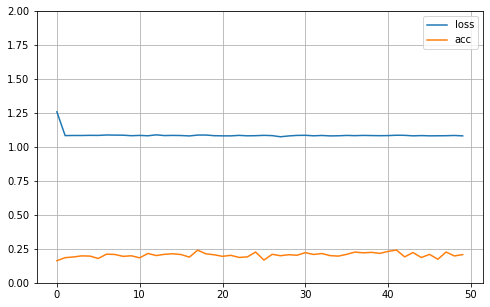

In [242]:
pd.DataFrame(history5.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 2)
plt.show()

In [246]:
pred5_raw = model5.predict(X_test_solo)

pred5 = []
for row in pred5_raw:
    pred5.append(row[0])
pred5 = np.array(pred5).reshape(-1,1)
pred5.shape

(436, 1)

In [247]:
y_test5 = []
for row in y_test_solo:
    y_test5.append(row[0])
y_test5 = np.array(y_test5).reshape(-1,1)
y_test5.shape

(436, 1)

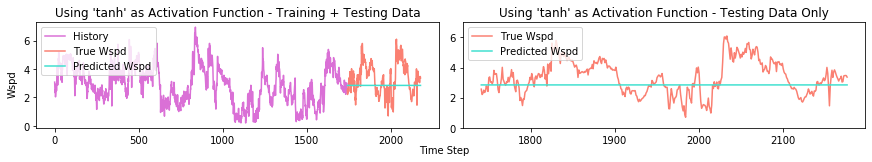

In [413]:
Title = "Using \'tanh\' as Activation Function"
time = [i for i in range(2177)]

fig = plt.figure(figsize=(12, 2))
gs = gridspec.GridSpec(1, 2, width_ratios=[1, 1])
ax0 = plt.subplot(gs[0])
ax1 = plt.subplot(gs[1])

axes = [ax0, ax1]


a = plt.gca()
a.set_ylim([0, 7])        
       
axes[0].plot(time[:1741], y_train1, label='History', color='orchid')
axes[0].plot(time[1741:], y_test5, label='True Wspd', color='salmon')
axes[0].plot(time[1741:], pred5, label='Predicted Wspd', color='turquoise')
       
axes[1].plot(time[1741:], y_test5, label='True Wspd', color='salmon')
axes[1].plot(time[1741:], pred5, label='Predicted Wspd', color='turquoise')
       
fig.tight_layout()
       
# Set labels
fig.text(0.5, 0.04, 'Time Step', ha='center', va='center')
fig.text(0, 0.5, 'Wspd', ha='center', va='center', rotation='vertical')

axes[0].set_title(Title + " - Training + Testing Data")
axes[1].set_title(Title + " - Testing Data Only")

ax0.legend(loc="upper left")
ax1.legend(loc="upper left")
plt.show()
plt.close()

## Model 6

In [254]:
numPoints, numFeatures = 40, 5

model6 = tf.keras.models.Sequential()
model6.add(tf.keras.layers.LSTM(256, return_sequences=True, input_shape=(numPoints, numFeatures)))
model6.add(tf.keras.layers.Dropout(rate=0.2))
model6.add(tf.keras.layers.LSTM(128, return_sequences=True))
model6.add(tf.keras.layers.Dropout(rate=0.2))
model6.add(tf.keras.layers.LSTM(64, activation='relu'))
model6.add(tf.keras.layers.Dense(5))

optimizer=tf.keras.optimizers.RMSprop(lr=0.001, rho=0.9)

model6.compile(
        optimizer=optimizer,
        loss = 'mse',
        metrics = ["accuracy"])

In [255]:
history6 = model6.fit(X_train_solo, y_train_solo, epochs = 50)

Epoch 1/50
1741/1741 [==============================] - 39s 22ms/sample - loss: 10062.5311 - acc: 0.1482
Epoch 2/50
1741/1741 [==============================] - 38s 22ms/sample - loss: 3951.9121 - acc: 0.1700
Epoch 3/50
1741/1741 [==============================] - 39s 22ms/sample - loss: 40.0472 - acc: 0.1683
Epoch 4/50
1741/1741 [==============================] - 40s 23ms/sample - loss: 4.3064 - acc: 0.1901
Epoch 5/50
1741/1741 [==============================] - 40s 23ms/sample - loss: 3.6454 - acc: 0.1804
Epoch 6/50
1741/1741 [==============================] - 40s 23ms/sample - loss: 6.1902 - acc: 0.2935
Epoch 7/50
1741/1741 [==============================] - 42s 24ms/sample - loss: 2.2760 - acc: 0.2246
Epoch 8/50
1741/1741 [==============================] - 42s 24ms/sample - loss: 1.7976 - acc: 0.2206
Epoch 9/50
1741/1741 [==============================] - 40s 23ms/sample - loss: 1.4584 - acc: 0.2183
Epoch 10/50
1741/1741 [==============================] - 40s 23ms/sample - loss: 1.

In [256]:
pred6_raw = model6.predict(X_test_solo)

pred6 = []
for row in pred6_raw:
    pred6.append(row[0])
pred6 = np.array(pred6).reshape(-1,1)
pred6.shape

(436, 1)

In [257]:
y_test6 = []
for row in y_test_solo:
    y_test6.append(row[0])
y_test6 = np.array(y_test6).reshape(-1,1)
y_test6.shape

(436, 1)

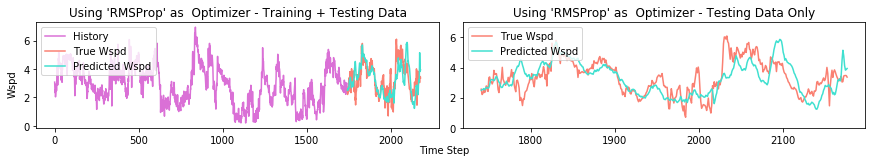

In [411]:
Title = "Using \'RMSProp\' as  Optimizer"
time = [i for i in range(2177)]

fig = plt.figure(figsize=(12, 2))
gs = gridspec.GridSpec(1, 2, width_ratios=[1, 1])
ax0 = plt.subplot(gs[0])
ax1 = plt.subplot(gs[1])

axes = [ax0, ax1]


a = plt.gca()
a.set_ylim([0, 7])        
       
axes[0].plot(time[:1741], y_train1, label='History', color='orchid')
axes[0].plot(time[1741:], y_test6, label='True Wspd', color='salmon')
axes[0].plot(time[1741:], pred6, label='Predicted Wspd', color='turquoise')
       
axes[1].plot(time[1741:], y_test6, label='True Wspd', color='salmon')
axes[1].plot(time[1741:], pred6, label='Predicted Wspd', color='turquoise')
       
fig.tight_layout()
       
# Set labels
fig.text(0.5, 0.04, 'Time Step', ha='center', va='center')
fig.text(0, 0.5, 'Wspd', ha='center', va='center', rotation='vertical')

axes[0].set_title(Title + " - Training + Testing Data")
axes[1].set_title(Title + " - Testing Data Only")

ax0.legend(loc="upper left")
ax1.legend(loc="upper left")
plt.show()
plt.close()

# Necessity for Scaler

## Model 7

In [339]:
numPoints, numFeatures = 40, 5

model7 = tf.keras.models.Sequential()
model7.add(tf.keras.layers.LSTM(256, return_sequences=True, input_shape=(numPoints, numFeatures)))
model7.add(tf.keras.layers.Dropout(rate=0.2))
model7.add(tf.keras.layers.LSTM(128, return_sequences=True))
model7.add(tf.keras.layers.Dropout(rate=0.2))
model7.add(tf.keras.layers.LSTM(64, return_sequences=True))
model7.add(tf.keras.layers.Dropout(rate=0.2))
model7.add(tf.keras.layers.LSTM(32, activation='relu'))
model7.add(tf.keras.layers.Dense(5))

model7.compile(
        optimizer='adam',
        loss = 'mse',
        metrics = ["accuracy"])

In [340]:
history7 = model7.fit(X_train_solo, y_train_solo, epochs = 50)

Epoch 1/50
1741/1741 [==============================] - 41s 24ms/sample - loss: 3.7062 - acc: 0.2430
Epoch 2/50
1741/1741 [==============================] - 39s 22ms/sample - loss: 1.5475 - acc: 0.2091
Epoch 3/50
1741/1741 [==============================] - 39s 22ms/sample - loss: 1.2812 - acc: 0.1987
Epoch 4/50
1741/1741 [==============================] - 39s 22ms/sample - loss: 1.0099 - acc: 0.1884
Epoch 5/50
1741/1741 [==============================] - 39s 23ms/sample - loss: 0.9922 - acc: 0.1855
Epoch 6/50
1741/1741 [==============================] - 39s 22ms/sample - loss: 0.8835 - acc: 0.2211
Epoch 7/50
1741/1741 [==============================] - 41s 24ms/sample - loss: 0.8257 - acc: 0.1993
Epoch 8/50
1741/1741 [==============================] - 42s 24ms/sample - loss: 0.7727 - acc: 0.1895
Epoch 9/50
1741/1741 [==============================] - 43s 25ms/sample - loss: 0.7634 - acc: 0.1970
Epoch 10/50
1741/1741 [==============================] - 43s 25ms/sample - loss: 0.7505 - a

In [341]:
pred7_raw = model7.predict(X_test_solo)

pred7 = []
for row in pred7_raw:
    pred7.append(row[0])
pred7 = np.array(pred7).reshape(-1,1)
pred7.shape

(436, 1)

In [343]:
y_test7 = []
for row in y_test_solo:
    y_test7.append(row[0])
y_test7 = np.array(y_test7).reshape(-1,1)
y_test7.shape

(436, 1)

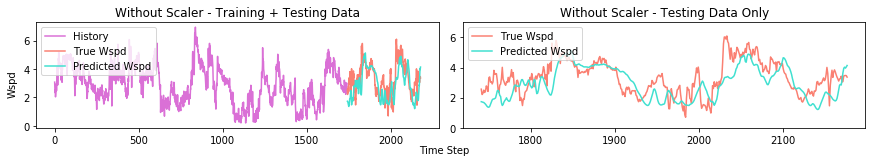

In [410]:
Title = "Without Scaler"
time = [i for i in range(2177)]

fig = plt.figure(figsize=(12, 2))
gs = gridspec.GridSpec(1, 2, width_ratios=[1, 1])
ax0 = plt.subplot(gs[0])
ax1 = plt.subplot(gs[1])

axes = [ax0, ax1]


a = plt.gca()
a.set_ylim([0, 7])        
       
axes[0].plot(time[:1741], y_train1, label='History', color='orchid')
axes[0].plot(time[1741:], y_test7, label='True Wspd', color='salmon')
axes[0].plot(time[1741:], pred7, label='Predicted Wspd', color='turquoise')
       
axes[1].plot(time[1741:], y_test7, label='True Wspd', color='salmon')
axes[1].plot(time[1741:], pred7, label='Predicted Wspd', color='turquoise')
       
fig.tight_layout()
       
# Set labels
fig.text(0.5, 0.04, 'Time Step', ha='center', va='center')
fig.text(0, 0.5, 'Wspd', ha='center', va='center', rotation='vertical')

axes[0].set_title(Title + " - Training + Testing Data")
axes[1].set_title(Title + " - Testing Data Only")

ax0.legend(loc="upper left")
ax1.legend(loc="upper left")
plt.show()
plt.close()

## Model 8

In [365]:
numPoints, numFeatures = 40, 5

model8 = tf.keras.models.Sequential()
model8.add(tf.keras.layers.LSTM(256, return_sequences=True, input_shape=(numPoints, numFeatures)))
model8.add(tf.keras.layers.Dropout(rate=0.2))
model8.add(tf.keras.layers.LSTM(128, return_sequences=True))
model8.add(tf.keras.layers.Dropout(rate=0.2))
model8.add(tf.keras.layers.LSTM(64, return_sequences=True))
model8.add(tf.keras.layers.Dropout(rate=0.2))
model8.add(tf.keras.layers.LSTM(32, activation='relu'))
model8.add(tf.keras.layers.Dense(5))

model8.compile(
        optimizer='adam',
        loss = 'mse',
        metrics = ["accuracy"])

In [366]:
history8 = model8.fit(X_train_solo, y_train_solo, epochs = 50)

Epoch 1/50
1741/1741 [==============================] - 49s 28ms/sample - loss: 0.0365 - acc: 0.1872
Epoch 2/50
1741/1741 [==============================] - 47s 27ms/sample - loss: 0.0182 - acc: 0.2194
Epoch 3/50
1741/1741 [==============================] - 46s 27ms/sample - loss: 0.0176 - acc: 0.1999
Epoch 4/50
1741/1741 [==============================] - 47s 27ms/sample - loss: 0.0167 - acc: 0.1987
Epoch 5/50
1741/1741 [==============================] - 47s 27ms/sample - loss: 0.0151 - acc: 0.2108
Epoch 6/50
1741/1741 [==============================] - 47s 27ms/sample - loss: 0.0150 - acc: 0.2091
Epoch 7/50
1741/1741 [==============================] - 48s 28ms/sample - loss: 0.0143 - acc: 0.2010
Epoch 8/50
1741/1741 [==============================] - 48s 27ms/sample - loss: 0.0137 - acc: 0.2056
Epoch 9/50
1741/1741 [==============================] - 48s 28ms/sample - loss: 0.0132 - acc: 0.2045
Epoch 10/50
1741/1741 [==============================] - 49s 28ms/sample - loss: 0.0138 - a

In [376]:
pred8_raw = model8.predict(X_test_solo)
pred8_raw = scaler.inverse_transform(pred8_raw)
pred8 = []
for row in pred8_raw:
    pred8.append(row[0])
pred8 = np.array(pred8).reshape(-1,1)
pred8.shape

(436, 1)

In [377]:
y_test8 = []
y_test_solo_inversed = scaler.inverse_transform(y_test_solo)
for row in y_test_solo_inversed:
    y_test8.append(row[0])

y_test8 = np.array(y_test8).reshape(-1,1)
y_test8.shape

(436, 1)

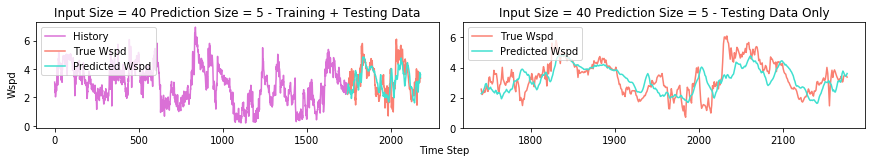

In [425]:
Title = "Input Size = 40 Prediction Size = 5"
time = [i for i in range(2177)]

fig = plt.figure(figsize=(12, 2))
gs = gridspec.GridSpec(1, 2, width_ratios=[1, 1])
ax0 = plt.subplot(gs[0])
ax1 = plt.subplot(gs[1])

axes = [ax0, ax1]


a = plt.gca()
a.set_ylim([0, 7])        
       
axes[0].plot(time[:1741], y_train1, label='History', color='orchid')
axes[0].plot(time[1741:], y_test8, label='True Wspd', color='salmon')
axes[0].plot(time[1741:], pred8, label='Predicted Wspd', color='turquoise')
       
axes[1].plot(time[1741:], y_test8, label='True Wspd', color='salmon')
axes[1].plot(time[1741:], pred8, label='Predicted Wspd', color='turquoise')
       
fig.tight_layout()
       
# Set labels
fig.text(0.5, 0.04, 'Time Step', ha='center', va='center')
fig.text(0, 0.5, 'Wspd', ha='center', va='center', rotation='vertical')

axes[0].set_title(Title + " - Training + Testing Data")
axes[1].set_title(Title + " - Testing Data Only")

ax0.legend(loc="upper left")
ax1.legend(loc="upper left")
plt.show()
plt.close()
        


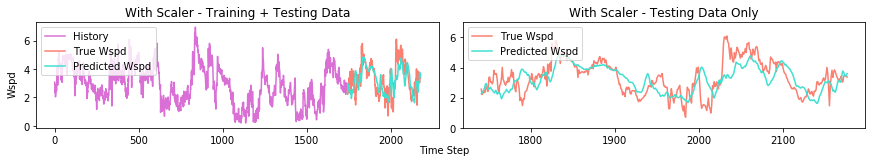

In [426]:
Title = "With Scaler"
time = [i for i in range(2177)]

fig = plt.figure(figsize=(12, 2))
gs = gridspec.GridSpec(1, 2, width_ratios=[1, 1])
ax0 = plt.subplot(gs[0])
ax1 = plt.subplot(gs[1])

axes = [ax0, ax1]


a = plt.gca()
a.set_ylim([0, 7])        
       
axes[0].plot(time[:1741], y_train1, label='History', color='orchid')
axes[0].plot(time[1741:], y_test8, label='True Wspd', color='salmon')
axes[0].plot(time[1741:], pred8, label='Predicted Wspd', color='turquoise')
       
axes[1].plot(time[1741:], y_test8, label='True Wspd', color='salmon')
axes[1].plot(time[1741:], pred8, label='Predicted Wspd', color='turquoise')
       
fig.tight_layout()
       
# Set labels
fig.text(0.5, 0.04, 'Time Step', ha='center', va='center')
fig.text(0, 0.5, 'Wspd', ha='center', va='center', rotation='vertical')

axes[0].set_title(Title + " - Training + Testing Data")
axes[1].set_title(Title + " - Testing Data Only")

ax0.legend(loc="upper left")
ax1.legend(loc="upper left")
plt.show()
plt.close()

# Observation Size and Prediction Size

## Model 9 (With Scaler)

In [394]:
numPoints, numFeatures = 20, 5

model9 = tf.keras.models.Sequential()
model9.add(tf.keras.layers.LSTM(256, return_sequences=True, input_shape=(numPoints, numFeatures)))
model9.add(tf.keras.layers.Dropout(rate=0.2))
model9.add(tf.keras.layers.LSTM(128, return_sequences=True))
model9.add(tf.keras.layers.Dropout(rate=0.2))
model9.add(tf.keras.layers.LSTM(64, return_sequences=True))
model9.add(tf.keras.layers.Dropout(rate=0.2))
model9.add(tf.keras.layers.LSTM(32, activation='relu'))
model9.add(tf.keras.layers.Dense(5))

model9.compile(
        optimizer='adam',
        loss = 'mse',
        metrics = ["accuracy"])

In [395]:
history9 = model9.fit(X_train_solo, y_train_solo, epochs = 50)

Epoch 1/50
1757/1757 [==============================] - 31s 18ms/sample - loss: 0.0421 - acc: 0.2163
Epoch 2/50
1757/1757 [==============================] - 28s 16ms/sample - loss: 0.0200 - acc: 0.2322
Epoch 3/50
1757/1757 [==============================] - 28s 16ms/sample - loss: 0.0175 - acc: 0.2231
Epoch 4/50
1757/1757 [==============================] - 29s 17ms/sample - loss: 0.0174 - acc: 0.2060
Epoch 5/50
1757/1757 [==============================] - 27s 15ms/sample - loss: 0.0162 - acc: 0.2157
Epoch 6/50
1757/1757 [==============================] - 27s 15ms/sample - loss: 0.0154 - acc: 0.2231
Epoch 7/50
1757/1757 [==============================] - 27s 15ms/sample - loss: 0.0148 - acc: 0.2094
Epoch 8/50
1757/1757 [==============================] - 27s 15ms/sample - loss: 0.0147 - acc: 0.2083
Epoch 9/50
1757/1757 [==============================] - 27s 15ms/sample - loss: 0.0138 - acc: 0.2117
Epoch 10/50
1757/1757 [==============================] - 27s 15ms/sample - loss: 0.0145 - a

In [399]:
pred9_raw = model9.predict(X_test_solo)
pred9_raw = scaler.inverse_transform(pred9_raw)
pred9 = []
for row in pred9_raw:
    pred9.append(row[0])
pred9 = np.array(pred9).reshape(-1,1)
pred9.shape

(440, 1)

In [397]:
y_test9 = []
y_test_solo_inversed = scaler.inverse_transform(y_test_solo)
for row in y_test_solo_inversed:
    y_test9.append(row[0])

y_test9 = np.array(y_test9).reshape(-1,1)
y_test9.shape

(440, 1)

In [401]:
y_train9 = []
y_train_solo_inversed = scaler.inverse_transform(y_train_solo)
for row in y_train_solo_inversed:
    y_train9.append(row[0])

y_train9 = np.array(y_train9).reshape(-1,1)
y_train9.shape

(1757, 1)

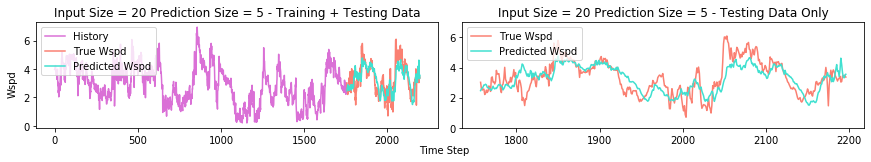

In [407]:
Title = "Input Size = 20 Prediction Size = 5"
time = [i for i in range(2197)]

fig = plt.figure(figsize=(12, 2))
gs = gridspec.GridSpec(1, 2, width_ratios=[1, 1])
ax0 = plt.subplot(gs[0])
ax1 = plt.subplot(gs[1])

axes = [ax0, ax1]


a = plt.gca()
a.set_ylim([0, 7])        
       
axes[0].plot(time[:1757], y_train9, label='History', color='orchid')
axes[0].plot(time[1757:], y_test9, label='True Wspd', color='salmon')
axes[0].plot(time[1757:], pred9, label='Predicted Wspd', color='turquoise')
       
axes[1].plot(time[1757:], y_test9, label='True Wspd', color='salmon')
axes[1].plot(time[1757:], pred9, label='Predicted Wspd', color='turquoise')
       
fig.tight_layout()
       
# Set labels
fig.text(0.5, 0.04, 'Time Step', ha='center', va='center')
fig.text(0, 0.5, 'Wspd', ha='center', va='center', rotation='vertical')

axes[0].set_title(Title + " - Training + Testing Data")
axes[1].set_title(Title + " - Testing Data Only")

ax0.legend(loc="upper left")
ax1.legend(loc="upper left")
plt.show()
plt.close()
        


## Model 10 

In [442]:
numPoints, numFeatures = 60, 5

model10 = tf.keras.models.Sequential()
model10.add(tf.keras.layers.LSTM(256, return_sequences=True, input_shape=(numPoints, numFeatures)))
model10.add(tf.keras.layers.Dropout(rate=0.2))
model10.add(tf.keras.layers.LSTM(128, return_sequences=True))
model10.add(tf.keras.layers.Dropout(rate=0.2))
model10.add(tf.keras.layers.LSTM(64, return_sequences=True))
model10.add(tf.keras.layers.Dropout(rate=0.2))
model10.add(tf.keras.layers.LSTM(32, activation='relu'))
model10.add(tf.keras.layers.Dense(5))

model10.compile(
        optimizer='adam',
        loss = 'mse',
        metrics = ["accuracy"])

In [443]:
history10 = model10.fit(X_train_solo, y_train_solo, epochs = 50)

Epoch 1/50
1725/1725 [==============================] - 70s 41ms/sample - loss: 0.0395 - acc: 0.2099
Epoch 2/50
1725/1725 [==============================] - 69s 40ms/sample - loss: 0.0190 - acc: 0.2058
Epoch 3/50
1725/1725 [==============================] - 71s 41ms/sample - loss: 0.0170 - acc: 0.2035
Epoch 4/50
1725/1725 [==============================] - 71s 41ms/sample - loss: 0.0164 - acc: 0.2006
Epoch 5/50
1725/1725 [==============================] - 71s 41ms/sample - loss: 0.0157 - acc: 0.2197
Epoch 6/50
1725/1725 [==============================] - 74s 43ms/sample - loss: 0.0154 - acc: 0.1977
Epoch 7/50
1725/1725 [==============================] - 74s 43ms/sample - loss: 0.0151 - acc: 0.2272
Epoch 8/50
1725/1725 [==============================] - 75s 43ms/sample - loss: 0.0148 - acc: 0.2232
Epoch 9/50
1725/1725 [==============================] - 75s 44ms/sample - loss: 0.0141 - acc: 0.2214
Epoch 10/50
1725/1725 [==============================] - 76s 44ms/sample - loss: 0.0135 - a

In [444]:
pred10_raw = model10.predict(X_test_solo)
pred10_raw = scaler.inverse_transform(pred10_raw)
pred10 = []
for row in pred10_raw:
    pred10.append(row[0])
pred10 = np.array(pred10).reshape(-1,1)
pred10.shape

(432, 1)

In [445]:
y_test10 = []
y_test_solo_inversed = scaler.inverse_transform(y_test_solo)
for row in y_test_solo_inversed:
    y_test10.append(row[0])

y_test10 = np.array(y_test10).reshape(-1,1)
y_test10.shape

(432, 1)

In [446]:
y_train10 = []
y_train_solo_inversed = scaler.inverse_transform(y_train_solo)
for row in y_train_solo_inversed:
    y_train10.append(row[0])

y_train10 = np.array(y_train10).reshape(-1,1)
y_train10.shape

(1725, 1)

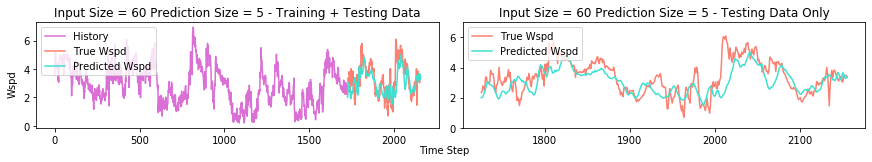

In [449]:
Title = "Input Size = 60 Prediction Size = 5"
time = [i for i in range(2157)]

fig = plt.figure(figsize=(12, 2))
gs = gridspec.GridSpec(1, 2, width_ratios=[1, 1])
ax0 = plt.subplot(gs[0])
ax1 = plt.subplot(gs[1])

axes = [ax0, ax1]


a = plt.gca()
a.set_ylim([0, 7])        
       
axes[0].plot(time[:1725], y_train10, label='History', color='orchid')
axes[0].plot(time[1725:], y_test10, label='True Wspd', color='salmon')
axes[0].plot(time[1725:], pred10, label='Predicted Wspd', color='turquoise')
       
axes[1].plot(time[1725:], y_test10, label='True Wspd', color='salmon')
axes[1].plot(time[1725:], pred10, label='Predicted Wspd', color='turquoise')
       
fig.tight_layout()
       
# Set labels
fig.text(0.5, 0.04, 'Time Step', ha='center', va='center')
fig.text(0, 0.5, 'Wspd', ha='center', va='center', rotation='vertical')

axes[0].set_title(Title + " - Training + Testing Data")
axes[1].set_title(Title + " - Testing Data Only")

ax0.legend(loc="upper left")
ax1.legend(loc="upper left")
plt.show()
plt.close()

## Model 11

In [487]:
numPoints, numFeatures = 40, 5

model11 = tf.keras.models.Sequential()
model11.add(tf.keras.layers.LSTM(256, return_sequences=True, input_shape=(numPoints, numFeatures)))
model11.add(tf.keras.layers.Dropout(rate=0.2))
model11.add(tf.keras.layers.LSTM(128, return_sequences=True))
model11.add(tf.keras.layers.Dropout(rate=0.2))
model11.add(tf.keras.layers.LSTM(64, return_sequences=True))
model11.add(tf.keras.layers.Dropout(rate=0.2))
model11.add(tf.keras.layers.LSTM(32, activation='relu'))
model11.add(tf.keras.layers.Dense(1))

model11.compile(
        optimizer='adam',
        loss = 'mse',
        metrics = ["accuracy"])

In [ ]:
history11 = model11.fit(X_train_solo, y_train_solo, epochs = 50)

Epoch 1/50
1744/1744 [==============================] - 64s 37ms/sample - loss: 0.0363 - acc: 5.7339e-04
Epoch 2/50
1744/1744 [==============================] - 57s 33ms/sample - loss: 0.0177 - acc: 0.0011
Epoch 3/50
1744/1744 [==============================] - 59s 34ms/sample - loss: 0.0158 - acc: 0.0011
Epoch 4/50
1744/1744 [==============================] - 60s 35ms/sample - loss: 0.0152 - acc: 0.0011
Epoch 5/50
1744/1744 [==============================] - 60s 35ms/sample - loss: 0.0146 - acc: 0.0011
Epoch 6/50
1744/1744 [==============================] - 60s 35ms/sample - loss: 0.0138 - acc: 0.0011
Epoch 7/50
1744/1744 [==============================] - 60s 35ms/sample - loss: 0.0133 - acc: 0.0011
Epoch 8/50
1744/1744 [==============================] - 61s 35ms/sample - loss: 0.0128 - acc: 0.0011
Epoch 9/50
1744/1744 [==============================] - 63s 36ms/sample - loss: 0.0123 - acc: 0.0011
Epoch 10/50
1744/1744 [==============================] - 62s 35ms/sample - loss: 0.0120

# Import Old Sold Data

In [146]:
# import packages
import pandas as pd
import numpy as np

In [159]:
# Upload Wind Data
WINDFILE_1828_PATH = "https://raw.githubusercontent.com/SophiaCheung1211/Using_Drone_to_Predict_Wind_Speed/master/Wind_Data/SOLO/Dat1828.csv"
WINDFILE_1928_PATH = "https://raw.githubusercontent.com/SophiaCheung1211/Using_Drone_to_Predict_Wind_Speed/master/Wind_Data/SOLO/Dat1928.csv"
WINDFILE_2023_PATH = "https://raw.githubusercontent.com/SophiaCheung1211/Using_Drone_to_Predict_Wind_Speed/master/Wind_Data/SOLO/Dat2023.csv"
wind_data_1828 = pd.read_csv(WINDFILE_1828_PATH)
wind_data_1928 = pd.read_csv(WINDFILE_1928_PATH) 
wind_data_2023 = pd.read_csv(WINDFILE_2023_PATH)


# Description of the data frame
print(wind_data_1828.shape)
print(wind_data_1928.shape)
print(wind_data_2023.shape)
wind_data_1828

(8703, 18)
(2239, 18)
(3105, 18)


,Logfile,Q,wdir,wspd,cwdir,gps cor,pres,r. humid,temp,dew,preci,preci int,sol rad,gps,date,supp volt,status,#NAME?
0,Tue 05 June 2018 13:35:08,Q,274,0.03,69,NaN,950.2,35,26.8,10.4,0,0,4,NaN,2018-06-05T17:34:37.1,13.4,2,1E
1,Tue 05 June 2018 13:35:08,Q,265,0.03,59,NaN,950.2,35,26.8,10.4,0,0,4,NaN,2018-06-05T17:34:38.1,13.4,2,12
2,Tue 05 June 2018 13:35:08,Q,262,0.03,56,NaN,950.2,35,26.8,10.4,0,0,4,NaN,2018-06-05T17:34:39.1,13.4,2,1B
3,Tue 05 June 2018 13:35:08,Q,257,0.03,51,NaN,950.2,35,26.8,10.4,0,0,4,NaN,2018-06-05T17:34:40.1,13.4,2,14
4,Tue 05 June 2018 13:35:08,Q,259,0.03,53,NaN,950.2,35,26.8,10.4,0,0,4,NaN,2018-06-05T17:34:41.1,13.4,2,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8698,Tue 05 June 2018 18:27:45,Q,316,2.27,294,2.27,947.9,38,25.3,10.1,0,0,380,+37.196492:-080.578368:+0537.59,2018-06-05T22:27:43.8,13.1,4,3D
8699,Tue 05 June 2018 18:27:46,Q,314,2.23,292,2.23,947.9,38,25.3,10.0,0,0,387,+37.196492:-080.578368:+0537.59,2018-06-05T22:27:44.8,13.1,4,38
8700,Tue 05 June 2018 18:27:47,Q,305,1.93,283,1.93,947.9,38,25.3,10.0,0,0,393,+37.196492:-080.578368:+0537.59,2018-06-05T22:27:45.8,13.1,4,3C
8701,Tue 05 June 2018 18:27:48,Q,308,2.18,286,2.18,947.9,38,25.3,10.0,0,0,397,+37.196492:-080.578368:+0537.59,2018-06-05T22:27:46.8,13.1,4,33


In [176]:
# subset useful features in wind data 
wind_data_1828_useful = wind_data_1828[['Logfile', 'date', 'wdir', 'wspd']]
wind_data_1928_useful = wind_data_1928[['Logfile', 'date', 'wdir', 'wspd']]
wind_data_2023_useful = wind_data_2023[['Logfile', 'date', 'wdir', 'wspd']]


In [ ]:
# Upload Drone Data
DRONEFILE_20180605_PATH = "2018-06-05 18-03-18.log"
DRONEFILE_RECENT3_PATH = "RECENT-3.log"
DRONEFILE_RECENT4_PATH = "RECENT-4.log"
DRONEFILE_RECENT6_PATH = "RECENT-6.log"

In [ ]:
# Data Cleaning for file 18-03-18.log

raw_data_20180605 = open(DRONEFILE_20180605_PATH, 'r')


# Storing different types of line into different lists
GPS_data_raw = []
BARO_data_raw = []
ATT_data_raw = []
NTUN_data_raw = []

# Features that each type of line has
GPS_col_name = []
BARO_col_name = []
ATT_col_name = []
NTUN_col_name = []

for line in raw_data_20180605:
    tmp = line.strip().split(',')
    
    # Getting features' name for different types of line
    if tmp[0] == 'FMT' and tmp[3] == ' GPS':
        tmp.pop(0)
        tmp.pop(0)
        tmp.pop(0)
        tmp.pop(1)
        GPS_col_name = tmp
        
    if tmp[0] == 'FMT' and tmp[3] == ' BARO':
        tmp.pop(0)
        tmp.pop(0)
        tmp.pop(0)
        tmp.pop(1)
        BARO_col_name = tmp
        
    if tmp[0] == 'FMT' and tmp[3] == ' ATT':
        tmp.pop(0)
        tmp.pop(0)
        tmp.pop(0)
        tmp.pop(1)
        ATT_col_name = tmp
        
    if tmp[0] == 'FMT' and tmp[3] == ' NTUN':
        tmp.pop(0)
        tmp.pop(0)
        tmp.pop(0)
        tmp.pop(1)
        NTUN_col_name = tmp
    
    # Collecting data for each type of line
    if tmp[0] == 'GPS':
        GPS_data_raw.append(tmp)
        
    if tmp[0] == 'BARO':
        BARO_data_raw.append(tmp)
        
    if tmp[0] == 'ATT':
        ATT_data_raw.append(tmp)
        
    if tmp[0] == 'NTUN':
        NTUN_data_raw.append(tmp)
        
# create data frame for each type of line

GPS_data_20180605 = pd.DataFrame(np.array(GPS_data_raw), columns=GPS_col_name)  
BARO_data_20180605 = pd.DataFrame(np.array(BARO_data_raw), columns=BARO_col_name) 
ATT_data_20180605 = pd.DataFrame(np.array(ATT_data_raw), columns=ATT_col_name) 
NTUN_data_20180605 = pd.DataFrame(np.array(NTUN_data_raw), columns=NTUN_col_name) 

# Description of the data frame
print("Data frame shape for 2018-06-05 18-03-18.log")
print("Shape for GPS:", GPS_data_20180605.shape)
print("Shape for BARO:", BARO_data_20180605.shape)
print("Shape for ATT:", ATT_data_20180605.shape)
print("Shape for NTUN:", NTUN_data_20180605.shape)

#Rename
GPS_data_20180605 = GPS_data_20180605.rename(columns={' TimeUS': 'TimeUS'})
BARO_data_20180605 = BARO_data_20180605.rename(columns={' TimeUS': 'TimeUS'})
ATT_data_20180605 = ATT_data_20180605.rename(columns={' TimeUS': 'TimeUS'})
NTUN_data_20180605 = NTUN_data_20180605.rename(columns={' TimeUS': 'TimeUS'})

# extracting usful features
GPS_data_20180605_useful = GPS_data_20180605[['TimeUS', 'GMS','GWk','Lat', 'Lng', 'Alt']]
BARO_data_20180605_useful = BARO_data_20180605[['TimeUS', 'Alt']]
ATT_data_20180605_useful = ATT_data_20180605[['TimeUS', 'Roll', 'Pitch', 'Yaw']]
NTUN_data_20180605_useful = NTUN_data_20180605[['TimeUS', 'PosX', 'PosY','VelX','VelY']]

# Casting
GPS_data_20180605_useful = GPS_data_20180605_useful.astype('float64')
BARO_data_20180605_useful = BARO_data_20180605_useful.astype('float64')
ATT_data_20180605_useful = ATT_data_20180605_useful.astype('float64')
NTUN_data_20180605_useful = NTUN_data_20180605_useful.astype('float64')

GPS_data_20180605_useful

In [161]:
# Data Cleaning for file RECENT-3.log

raw_data_RECENT3 = open(DRONEFILE_RECENT3_PATH,'r')

# Storing different types of line into different lists
GPS_data_raw2 = []
BARO_data_raw2 = []
ATT_data_raw2 = []
NTUN_data_raw2 = []

# Features that each type of line has
GPS_col_name2 = []
BARO_col_name2 = []
ATT_col_name2 = []
NTUN_col_name2 = []

for line in raw_data_RECENT3:
    tmp = line.strip().split(',')
    
    # Getting features' name for different types of line
    if tmp[0] == 'FMT' and tmp[3] == ' GPS':
        tmp.pop(0)
        tmp.pop(0)
        tmp.pop(0)
        tmp.pop(1)
        GPS_col_name2 = tmp
        
    if tmp[0] == 'FMT' and tmp[3] == ' BARO':
        tmp.pop(0)
        tmp.pop(0)
        tmp.pop(0)
        tmp.pop(1)
        BARO_col_name2 = tmp
        
    if tmp[0] == 'FMT' and tmp[3] == ' ATT':
        tmp.pop(0)
        tmp.pop(0)
        tmp.pop(0)
        tmp.pop(1)
        ATT_col_name2 = tmp
        
    if tmp[0] == 'FMT' and tmp[3] == ' NTUN':
        tmp.pop(0)
        tmp.pop(0)
        tmp.pop(0)
        tmp.pop(1)
        NTUN_col_name2 = tmp
    
    # Collecting data for each type of line
    if tmp[0] == 'GPS':
        GPS_data_raw2.append(tmp)
        
    if tmp[0] == 'BARO':
        BARO_data_raw2.append(tmp)
        
    if tmp[0] == 'ATT':
        ATT_data_raw2.append(tmp)
        
    if tmp[0] == 'NTUN':
        NTUN_data_raw2.append(tmp)
        


GPS_data_RECENT3 = pd.DataFrame(np.array(GPS_data_raw2), columns=GPS_col_name2)  
BARO_data_RECENT3 = pd.DataFrame(np.array(BARO_data_raw2), columns=BARO_col_name2) 
ATT_data_RECENT3 = pd.DataFrame(np.array(ATT_data_raw2), columns=ATT_col_name2) 
NTUN_data_RECENT3 = pd.DataFrame(np.array(NTUN_data_raw2), columns=NTUN_col_name2) 

# Description of the data frame
print("Data frame shape for RECENT-3.log")
print("Shape for GPS:", GPS_data_RECENT3.shape)
print("Shape for BARO:", BARO_data_RECENT3.shape)
print("Shape for ATT:", ATT_data_RECENT3.shape)
print("Shape for NTUN:", NTUN_data_RECENT3.shape)

#Rename
GPS_data_RECENT3 = GPS_data_RECENT3.rename(columns={' TimeUS': 'TimeUS'})
BARO_data_RECENT3 = BARO_data_RECENT3.rename(columns={' TimeUS': 'TimeUS'})
ATT_data_RECENT3 = ATT_data_RECENT3.rename(columns={' TimeUS': 'TimeUS'})
NTUN_data_RECENT3 = NTUN_data_RECENT3.rename(columns={' TimeUS': 'TimeUS'})

# extracting usful features
GPS_data_RECENT3_useful = GPS_data_RECENT3[['TimeUS', 'GMS','GWk','Lat', 'Lng', 'Alt']]
BARO_data_RECENT3_useful = BARO_data_RECENT3[['TimeUS', 'Alt']]
ATT_data_RECENT3_useful = ATT_data_RECENT3[['TimeUS', 'Roll', 'Pitch', 'Yaw']]
NTUN_data_RECENT3_useful = NTUN_data_RECENT3[['TimeUS', 'PosX', 'PosY','VelX','VelY']]

# Casting
GPS_data_RECENT3_useful = GPS_data_RECENT3_useful.astype('float64')
BARO_data_RECENT3_useful = BARO_data_RECENT3_useful.astype('float64')
ATT_data_RECENT3_useful = ATT_data_RECENT3_useful.astype('float64')
NTUN_data_RECENT3_useful = NTUN_data_RECENT3_useful.astype('float64')

GPS_data_RECENT3_useful 

Data frame shape for RECENT-3.log
Shape for GPS: (3248, 14)
Shape for BARO: (5060, 9)
Shape for ATT: (4870, 10)
Shape for NTUN: (4866, 12)


,TimeUS,GMS,GWk,Lat,Lng,Alt
0,21568718.0,253022400.0,2004.0,37.196424,-80.578308,524.92
1,22365679.0,253023200.0,2004.0,37.196423,-80.578308,525.05
2,22769097.0,253023600.0,2004.0,37.196423,-80.578308,525.11
3,22966396.0,253023800.0,2004.0,37.196423,-80.578308,525.13
4,23164828.0,253024000.0,2004.0,37.196423,-80.578308,525.17
...,...,...,...,...,...,...
3243,671017756.0,253671800.0,2004.0,37.196434,-80.578304,526.82
3244,671190006.0,253672000.0,2004.0,37.196434,-80.578304,526.82
3245,671384617.0,253672200.0,2004.0,37.196434,-80.578304,526.83
3246,671599984.0,253672400.0,2004.0,37.196434,-80.578304,526.85


In [162]:
# Data Cleaning for file RECENT-4.log

raw_data_RECENT4 = open(DRONEFILE_RECENT4_PATH,'r')

# Storing different types of line into different lists
GPS_data_raw3 = []
BARO_data_raw3 = []
ATT_data_raw3 = []
NTUN_data_raw3 = []

# Features that each type of line has
GPS_col_name3 = []
BARO_col_name3 = []
ATT_col_name3 = []
NTUN_col_name3 = []

for line in raw_data_RECENT4:
    tmp = line.strip().split(',')
    
    # Getting features' name for different types of line
    if tmp[0] == 'FMT' and tmp[3] == ' GPS':
        tmp.pop(0)
        tmp.pop(0)
        tmp.pop(0)
        tmp.pop(1)
        GPS_col_name3 = tmp
        
    if tmp[0] == 'FMT' and tmp[3] == ' BARO':
        tmp.pop(0)
        tmp.pop(0)
        tmp.pop(0)
        tmp.pop(1)
        BARO_col_name3 = tmp
        
    if tmp[0] == 'FMT' and tmp[3] == ' ATT':
        tmp.pop(0)
        tmp.pop(0)
        tmp.pop(0)
        tmp.pop(1)
        ATT_col_name3 = tmp
        
    if tmp[0] == 'FMT' and tmp[3] == ' NTUN':
        tmp.pop(0)
        tmp.pop(0)
        tmp.pop(0)
        tmp.pop(1)
        NTUN_col_name3 = tmp
    
    # Collecting data for each type of line
    if tmp[0] == 'GPS':
        GPS_data_raw3.append(tmp)
        
    if tmp[0] == 'BARO':
        BARO_data_raw3.append(tmp)
        
    if tmp[0] == 'ATT':
        ATT_data_raw3.append(tmp)
        
    if tmp[0] == 'NTUN':
        NTUN_data_raw3.append(tmp)
        


GPS_data_RECENT4 = pd.DataFrame(np.array(GPS_data_raw3), columns=GPS_col_name3)  
BARO_data_RECENT4 = pd.DataFrame(np.array(BARO_data_raw3), columns=BARO_col_name3) 
ATT_data_RECENT4 = pd.DataFrame(np.array(ATT_data_raw3), columns=ATT_col_name3) 
NTUN_data_RECENT4 = pd.DataFrame(np.array(NTUN_data_raw3), columns=NTUN_col_name3) 

# Description of the data frame
print("Data frame shape for 2018-06-05 18-03-18.log")
print("Shape for GPS:", GPS_data_RECENT4.shape)
print("Shape for BARO:", BARO_data_RECENT4.shape)
print("Shape for ATT:", ATT_data_RECENT4.shape)
print("Shape for NTUN:", NTUN_data_RECENT4.shape)

#Rename
GPS_data_RECENT4 = GPS_data_RECENT4.rename(columns={' TimeUS': 'TimeUS'})
BARO_data_RECENT4 = BARO_data_RECENT4.rename(columns={' TimeUS': 'TimeUS'})
ATT_data_RECENT4 = ATT_data_RECENT4.rename(columns={' TimeUS': 'TimeUS'})
NTUN_data_RECENT4 = NTUN_data_RECENT4.rename(columns={' TimeUS': 'TimeUS'})

# extracting usful features
GPS_data_RECENT4_useful = GPS_data_RECENT4[['TimeUS', 'GMS','GWk', 'Lat', 'Lng', 'Alt']]
BARO_data_RECENT4_useful = BARO_data_RECENT4[['TimeUS', 'Alt']]                                      
ATT_data_RECENT4_useful = ATT_data_RECENT4[['TimeUS', 'Roll', 'Pitch', 'Yaw']]
NTUN_data_RECENT4_useful = NTUN_data_RECENT4[['TimeUS', 'PosX', 'PosY','VelX','VelY']]

# Casting
GPS_data_RECENT4_useful = GPS_data_RECENT4_useful.astype('float64')
BARO_data_RECENT4_useful = BARO_data_RECENT4_useful.astype('float64')
ATT_data_RECENT4_useful = ATT_data_RECENT4_useful.astype('float64')
NTUN_data_RECENT4_useful = NTUN_data_RECENT4_useful.astype('float64')

GPS_data_RECENT4_useful

Data frame shape for 2018-06-05 18-03-18.log
Shape for GPS: (3761, 14)
Shape for BARO: (5867, 9)
Shape for ATT: (5663, 10)
Shape for NTUN: (5661, 12)


,TimeUS,GMS,GWk,Lat,Lng,Alt
0,32892712.0,252203800.0,2004.0,0.000000,0.000000,-17.00
1,33082423.0,252204000.0,2004.0,0.000000,0.000000,-17.00
2,33303285.0,252204200.0,2004.0,0.000000,0.000000,-17.00
3,33501824.0,252204400.0,2004.0,0.000000,0.000000,-17.00
4,33693249.0,252204600.0,2004.0,0.000000,0.000000,-17.00
...,...,...,...,...,...,...
3756,784389882.0,252955200.0,2004.0,37.196429,-80.578308,526.74
3757,784608569.0,252955400.0,2004.0,37.196429,-80.578308,526.75
3758,784797140.0,252955600.0,2004.0,37.196429,-80.578308,526.75
3759,785004268.0,252955800.0,2004.0,37.196429,-80.578308,526.76


In [177]:
## Data Cleaning for file RECENT-6.log

raw_data_RECENT6 = open(DRONEFILE_RECENT6_PATH,'r')

# Storing different types of line into different lists
GPS_data_raw4 = []
BARO_data_raw4 = []
ATT_data_raw4 = []
NTUN_data_raw4 = []

# Features that each type of line has
GPS_col_name4 = []
BARO_col_name4 = []
ATT_col_name4 = []
NTUN_col_name4 = []

for line in raw_data_RECENT6:
    tmp = line.strip().split(',')
    
    # Getting features' name for different types of line
    if tmp[0] == 'FMT' and tmp[3] == ' GPS':
        tmp.pop(0)
        tmp.pop(0)
        tmp.pop(0)
        tmp.pop(1)
        GPS_col_name4 = tmp
        
    if tmp[0] == 'FMT' and tmp[3] == ' BARO':
        tmp.pop(0)
        tmp.pop(0)
        tmp.pop(0)
        tmp.pop(1)
        BARO_col_name4 = tmp
        
    if tmp[0] == 'FMT' and tmp[3] == ' ATT':
        tmp.pop(0)
        tmp.pop(0)
        tmp.pop(0)
        tmp.pop(1)
        ATT_col_name4 = tmp
        
    if tmp[0] == 'FMT' and tmp[3] == ' NTUN':
        tmp.pop(0)
        tmp.pop(0)
        tmp.pop(0)
        tmp.pop(1)
        NTUN_col_name4 = tmp
    
    # Collecting data for each type of line
    if tmp[0] == 'GPS':
        GPS_data_raw4.append(tmp)
        
    if tmp[0] == 'BARO':
        BARO_data_raw4.append(tmp)
        
    if tmp[0] == 'ATT':
        ATT_data_raw4.append(tmp)
        
    if tmp[0] == 'NTUN':
        NTUN_data_raw4.append(tmp)
        


GPS_data_RECENT6 = pd.DataFrame(np.array(GPS_data_raw4), columns=GPS_col_name4)  
BARO_data_RECENT6 = pd.DataFrame(np.array(BARO_data_raw4), columns=BARO_col_name4) 
ATT_data_RECENT6 = pd.DataFrame(np.array(ATT_data_raw4), columns=ATT_col_name4) 
NTUN_data_RECENT6 = pd.DataFrame(np.array(NTUN_data_raw4), columns=NTUN_col_name4) 

# Description of the data frame
print("Data frame shape for 2018-06-05 18-03-18.log")
print("Shape for GPS:", GPS_data_RECENT6.shape)
print("Shape for BARO:", BARO_data_RECENT6.shape)
print("Shape for ATT:", ATT_data_RECENT6.shape)
print("Shape for NTUN:", NTUN_data_RECENT6.shape)

#Rename
GPS_data_RECENT6 = GPS_data_RECENT6.rename(columns={' TimeUS': 'TimeUS'})
BARO_data_RECENT6 = BARO_data_RECENT6.rename(columns={' TimeUS': 'TimeUS'})
ATT_data_RECENT6 = ATT_data_RECENT6.rename(columns={' TimeUS': 'TimeUS'})
NTUN_data_RECENT6 = NTUN_data_RECENT6.rename(columns={' TimeUS': 'TimeUS'})

# extracting usful features
GPS_data_RECENT6_useful = GPS_data_RECENT6[['TimeUS', 'GMS','GWk', 'Lat', 'Lng', 'Alt']]
BARO_data_RECENT6_useful = BARO_data_RECENT6[['TimeUS', 'Alt']]                                      
ATT_data_RECENT6_useful = ATT_data_RECENT6[['TimeUS', 'Roll', 'Pitch', 'Yaw']]
NTUN_data_RECENT6_useful = NTUN_data_RECENT6[['TimeUS', 'PosX', 'PosY','VelX','VelY']]

# Casting
GPS_data_RECENT6_useful = GPS_data_RECENT6_useful.astype('float64')
BARO_data_RECENT6_useful = BARO_data_RECENT6_useful.astype('float64')
ATT_data_RECENT6_useful = ATT_data_RECENT6_useful.astype('float64')
NTUN_data_RECENT6_useful = NTUN_data_RECENT6_useful.astype('float64')

GPS_data_RECENT6_useful

Data frame shape for 2018-06-05 18-03-18.log
Shape for GPS: (3336, 14)
Shape for BARO: (5194, 9)
Shape for ATT: (4998, 10)
Shape for NTUN: (4992, 12)


,TimeUS,GMS,GWk,Lat,Lng,Alt
0,22663278.0,259597400.0,2004.0,37.196402,-80.578349,527.07
1,22857912.0,259597600.0,2004.0,37.196402,-80.578349,527.07
2,23070363.0,259597800.0,2004.0,37.196402,-80.578349,527.07
3,23261688.0,259598000.0,2004.0,37.196402,-80.578349,527.09
4,23472629.0,259598200.0,2004.0,37.196402,-80.578349,527.09
...,...,...,...,...,...,...
3331,688898267.0,260263600.0,2004.0,37.196420,-80.578330,527.32
3332,689112678.0,260263800.0,2004.0,37.196420,-80.578330,527.33
3333,689295707.0,260264000.0,2004.0,37.196420,-80.578329,527.34
3334,689504762.0,260264200.0,2004.0,37.196420,-80.578329,527.34


## Time Converting

### Coverting GPS time to UTC time (GPS Data Only)

In [178]:
import datetime, time

# define a function to convert UPS time to UTC time
# return a string of UTC time that can be used for concatenating wind data and drone data
def ups_to_utc_string(row):
    import time
    time_1980_1_6 = datetime.datetime(1980, 1, 6).timetuple()
    base_time = time.mktime(time_1980_1_6)
    add_week = int(row.GWk) * 7 * 60 * 60 * 24
    add_ms = int(row.GMS)/1000
    time = time.localtime(base_time + add_week + add_ms - 3633)
    
    # make sure every field is two digit 
    if (time.tm_mon < 10):
        month = "0" + str(time.tm_mon)
    else:
        month = str(time.tm_mon)
    if (time.tm_mday < 10):
        day = "0" + str(time.tm_mday)
    else:
        day = str(time.tm_mday)
    if (time.tm_hour < 10):
        hour = "0" + str(time.tm_hour)
    else:
        hour = str(time.tm_hour)
    if (time.tm_min < 10):
        minutes = "0" + str(time.tm_min)
    else:
        minutes = str(time.tm_min)
    if (time.tm_sec < 10):
        sec = "0" + str(time.tm_sec)
    else:
        sec = str(time.tm_sec)
        
    return str(time.tm_year) + month + day + hour + minutes + sec

# return a time as a string
def ups_to_utc_time(row):
    import time
    time_1980_1_6 = datetime.datetime(1980, 1, 6).timetuple()
    base_time = time.mktime(time_1980_1_6)
    add_week = int(row.GWk) * 7 * 60 * 60 * 24
    add_ms = int(row.GMS)/1000
    time = time.localtime(base_time + add_week + add_ms - 3633)
    
    return time

    
## apply to all drone data frame 
tmp_time = []
for df in [GPS_data_RECENT4_useful, GPS_data_RECENT3_useful, GPS_data_RECENT6_useful, GPS_data_20180605_useful]:
    for (index, row) in df.iterrows():
        tmp_time.append(ups_to_utc_string(row))
    df['TimeUTC'] = tmp_time
    tmp_time = []

tmp_time_object = []
for df in [GPS_data_RECENT4_useful, GPS_data_RECENT3_useful, GPS_data_RECENT6_useful, GPS_data_20180605_useful]:
    for (index, row) in df.iterrows():
        tmp_time_object.append(ups_to_utc_time(row))
    df['TimeObject'] = tmp_time_object
    tmp_time_object = []

### Coverting GPS time to UTC time (BARO, NTUN, and ATT Data )

In [179]:
GPS_data_20180605_useful.iloc[10]

TimeUS                               2.48927e+07
GMS                                  2.52196e+08
GWk                                         2004
Lat                                            0
Lng                                            0
Alt                                          -17
TimeUTC                           20180605220242
TimeObject    (2018, 6, 5, 22, 2, 42, 1, 156, 1)
Name: 46, dtype: object

In [180]:
# storing the base time
import time
# 20180605
GPS_data_20180605_time_marker = GPS_data_20180605_useful.iloc[10]['TimeObject']
basetime_20180605 = time.mktime(GPS_data_20180605_time_marker)
ustime_GPS_data_20180605 = (GPS_data_20180605_useful.iloc[10]['TimeUS'])/1000000

# Recent3
GPS_data_recent3_time_marker = GPS_data_RECENT3_useful.iloc[10]['TimeObject']
basetime_recent3 = time.mktime(GPS_data_recent3_time_marker)
ustime_GPS_data_recent3 = (GPS_data_RECENT3_useful.iloc[10]['TimeUS'])/1000000

# Recent4
GPS_data_recent4_time_marker = GPS_data_RECENT4_useful.iloc[10]['TimeObject']
basetime_recent4 = time.mktime(GPS_data_recent4_time_marker)
ustime_GPS_data_recent4 = (GPS_data_RECENT4_useful.iloc[10]['TimeUS'])/1000000

# Recent6
GPS_data_recent6_time_marker = GPS_data_RECENT6_useful.iloc[10]['TimeObject']
basetime_recent6 = time.mktime(GPS_data_recent6_time_marker)
ustime_GPS_data_recent6 = (GPS_data_RECENT6_useful.iloc[10]['TimeUS'])/1000000


In [181]:
# example after converting time
ATT_data_20180605_useful.loc[200:210,:]

,TimeUS,Roll,Pitch,Yaw,TimeUTC
208,35608291.0,-1.9,0.41,36.31,20180605220252


In [192]:
# drop rows that has same times - only keep the latest data for each seconds
GPS_data_20180605_useful.drop_duplicates(subset='TimeUTC', keep='last', inplace=True)
GPS_data_RECENT3_useful.drop_duplicates(subset='TimeUTC', keep='last', inplace=True)
GPS_data_RECENT4_useful.drop_duplicates(subset='TimeUTC', keep='last', inplace=True)
GPS_data_RECENT6_useful.drop_duplicates(subset='TimeUTC', keep='last', inplace=True)

BARO_data_20180605_useful.drop_duplicates(subset='TimeUTC', keep='last', inplace=True)
BARO_data_RECENT3_useful.drop_duplicates(subset='TimeUTC', keep='last', inplace=True)
BARO_data_RECENT4_useful.drop_duplicates(subset='TimeUTC', keep='last', inplace=True)
BARO_data_RECENT6_useful.drop_duplicates(subset='TimeUTC', keep='last', inplace=True)

ATT_data_20180605_useful.drop_duplicates(subset='TimeUTC', keep='last', inplace=True)
ATT_data_RECENT3_useful.drop_duplicates(subset='TimeUTC', keep='last', inplace=True)
ATT_data_RECENT4_useful.drop_duplicates(subset='TimeUTC', keep='last', inplace=True)
ATT_data_RECENT6_useful.drop_duplicates(subset='TimeUTC', keep='last', inplace=True)

NTUN_data_20180605_useful.drop_duplicates(subset='TimeUTC', keep='last', inplace=True)
NTUN_data_RECENT3_useful.drop_duplicates(subset='TimeUTC', keep='last', inplace=True)
NTUN_data_RECENT4_useful.drop_duplicates(subset='TimeUTC', keep='last', inplace=True)
NTUN_data_RECENT6_useful.drop_duplicates(subset='TimeUTC', keep='last', inplace=True)

In [193]:
# function that takes a base time from GPS data and a TimeUS fron BARO, NTUN, and ATT data.
# Then, convert the GPS time to UTC time
def timeus_to_utctime (row, basetime, ustime):
    timeUS = row.TimeUS/1000000
    time_diff = 0
    time_added = 0
    if timeUS < ustime:
        time_diff = ustime - timeUS
        time_added = basetime - time_diff
    if timeUS > ustime:
        time_diff = timeUS - ustime 
        time_added = basetime + time_diff
    time_converted = time.localtime(time_added)
    
    if (time_converted.tm_mon < 10):
        month2 = "0" + str( time_converted.tm_mon)
    else:
        month2 = str( time_converted.tm_mon)
    if (time_converted.tm_mday < 10):
        day2 = "0" + str(time_converted.tm_mday)
    else:
        day2 = str(time_converted.tm_mday)
    if (time_converted.tm_hour < 10):
        hour2 = "0" + str(time_converted.tm_hour)
    else:
        hour2 = str(time_converted.tm_hour)
    if (time_converted.tm_min < 10):
        minutes2 = "0" + str(time_converted.tm_min)
    else:
        minutes2 = str(time_converted.tm_min)
    if (time_converted.tm_sec < 10):
        sec2 = "0" + str(time_converted.tm_sec)
    else:
        sec2 = str(time_converted.tm_sec)
        
    return str(time_converted.tm_year) + month2 + day2 + hour2 + minutes2 + sec2

# time converting for 20180605 file
tmp_time_20180605 = []
for df in [BARO_data_20180605_useful, ATT_data_20180605_useful, NTUN_data_20180605_useful]:
    for (index, row) in df.iterrows():
        tmp_time_20180605.append(timeus_to_utctime(row, basetime_20180605, ustime_GPS_data_20180605))
    df['TimeUTC'] = tmp_time_20180605
    tmp_time_20180605 = []

# # time converting for recent3 file
tmp_time_recent3 = []
for df in [BARO_data_RECENT3_useful, ATT_data_RECENT3_useful, NTUN_data_RECENT3_useful]:
    for (index, row) in df.iterrows():
        tmp_time_recent3.append(timeus_to_utctime(row, basetime_recent3, ustime_GPS_data_recent3))
    df['TimeUTC'] = tmp_time_recent3
    tmp_time_recent3 = []
    
# # time converting for recent4 file
tmp_time_recent4 = []
for df in [BARO_data_RECENT4_useful, ATT_data_RECENT4_useful, NTUN_data_RECENT4_useful]:
    for (index, row) in df.iterrows():
        tmp_time_recent4.append(timeus_to_utctime(row, basetime_recent4, ustime_GPS_data_recent4))
    df['TimeUTC'] = tmp_time_recent4
    tmp_time_recent4 = []

# # time converting for recent6 file
tmp_time_recent6 = []
for df in [BARO_data_RECENT6_useful, ATT_data_RECENT6_useful, NTUN_data_RECENT6_useful]:
    for (index, row) in df.iterrows():
        tmp_time_recent6.append(timeus_to_utctime(row, basetime_recent6, ustime_GPS_data_recent6))
    df['TimeUTC'] = tmp_time_recent6
    tmp_time_recent6 = []
    


In [194]:
# drop rows that has same times - only keep the latest data for each seconds
GPS_data_20180605_useful.drop_duplicates(subset='TimeUTC', keep='last', inplace=True)
GPS_data_RECENT3_useful.drop_duplicates(subset='TimeUTC', keep='last', inplace=True)
GPS_data_RECENT4_useful.drop_duplicates(subset='TimeUTC', keep='last', inplace=True)
GPS_data_RECENT6_useful.drop_duplicates(subset='TimeUTC', keep='last', inplace=True)


BARO_data_20180605_useful.drop_duplicates(subset='TimeUTC', keep='last', inplace=True)
BARO_data_RECENT3_useful.drop_duplicates(subset='TimeUTC', keep='last', inplace=True)
BARO_data_RECENT4_useful.drop_duplicates(subset='TimeUTC', keep='last', inplace=True)
BARO_data_RECENT6_useful.drop_duplicates(subset='TimeUTC', keep='last', inplace=True)


ATT_data_20180605_useful.drop_duplicates(subset='TimeUTC', keep='last', inplace=True)
ATT_data_RECENT3_useful.drop_duplicates(subset='TimeUTC', keep='last', inplace=True)
ATT_data_RECENT4_useful.drop_duplicates(subset='TimeUTC', keep='last', inplace=True)
ATT_data_RECENT6_useful.drop_duplicates(subset='TimeUTC', keep='last', inplace=True)

NTUN_data_20180605_useful.drop_duplicates(subset='TimeUTC', keep='last', inplace=True)
NTUN_data_RECENT3_useful.drop_duplicates(subset='TimeUTC', keep='last', inplace=True)
NTUN_data_RECENT4_useful.drop_duplicates(subset='TimeUTC', keep='last', inplace=True)
NTUN_data_RECENT6_useful.drop_duplicates(subset='TimeUTC', keep='last', inplace=True)



### Rename UTC Time in Wind File

In [195]:
# Change date type to be able to merge with drone data

tmp_string = []
for df in [wind_data_1828_useful,wind_data_1928_useful, wind_data_2023_useful]:
    for (index, row) in df.iterrows():
        string_time = row.date[:4] + row.date[5:7] + row.date[8:10] + row.date[11:13] + row.date[14:16] + row.date[17:19]
        tmp_string.append(string_time)
    df['TimeUTC'] = tmp_string
    tmp_string = []

C:\Users\eric_\anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [196]:
# merge wind data and drone data
GPS_20180605 = pd.merge(wind_data_1828_useful, GPS_data_20180605_useful, on='TimeUTC')
GPS_RECENT3 = pd.merge(wind_data_1828_useful, GPS_data_RECENT3_useful, on='TimeUTC')
GPS_RECENT4 = pd.merge(wind_data_1828_useful, GPS_data_RECENT4_useful, on='TimeUTC')
GPS_RECENT6 = pd.merge(wind_data_2023_useful, GPS_data_RECENT6_useful, on='TimeUTC')

BARO_20180605 = pd.merge(wind_data_1828_useful, BARO_data_20180605_useful, on='TimeUTC')
BARO_RECENT3 = pd.merge(wind_data_1828_useful, BARO_data_RECENT3_useful, on='TimeUTC')
BARO_RECENT4 = pd.merge(wind_data_1828_useful, BARO_data_RECENT4_useful, on='TimeUTC')
BARO_RECENT6 = pd.merge(wind_data_2023_useful, BARO_data_RECENT6_useful, on='TimeUTC')

ATT_20180605 = pd.merge(wind_data_1828_useful, ATT_data_20180605_useful, on='TimeUTC')
ATT_RECENT3 = pd.merge(wind_data_1828_useful, ATT_data_RECENT3_useful, on='TimeUTC')
ATT_RECENT4 = pd.merge(wind_data_1828_useful, ATT_data_RECENT4_useful, on='TimeUTC')
ATT_RECENT6 = pd.merge(wind_data_2023_useful, ATT_data_RECENT6_useful, on='TimeUTC')

NTUN_20180605 = pd.merge(wind_data_1828_useful, NTUN_data_20180605_useful, on='TimeUTC')
NTUN_RECENT3 = pd.merge(wind_data_1828_useful, NTUN_data_RECENT3_useful, on='TimeUTC')
NTUN_RECENT4 = pd.merge(wind_data_1828_useful, NTUN_data_RECENT4_useful, on='TimeUTC')
NTUN_RECENT6 = pd.merge(wind_data_2023_useful, NTUN_data_RECENT6_useful, on='TimeUTC')


## Drop Useless Data Point (Only keep the data when the drone is hovering)

In [197]:
def time_string_to_num(row):
    tmp = row.Logfile[17:19] + row.Logfile[20:22] + row.Logfile[23:]
    return int(tmp)

int_time = []    
for df in [GPS_20180605, GPS_RECENT3, GPS_RECENT4, GPS_RECENT6, BARO_20180605, BARO_RECENT3, BARO_RECENT4, BARO_RECENT6, ATT_20180605, ATT_RECENT3, ATT_RECENT4, ATT_RECENT6, NTUN_20180605, NTUN_RECENT3, NTUN_RECENT4, NTUN_RECENT6]:
    for (index, row) in df.iterrows():
        int_time.append(time_string_to_num(row))
    df['IntTime'] = int_time
    int_time = []

In [198]:
GPS_RECENT3  = GPS_RECENT3[GPS_RECENT3.IntTime > 181859]
GPS_RECENT3  = GPS_RECENT3[GPS_RECENT3.IntTime < 182701]
BARO_RECENT3 = BARO_RECENT3[BARO_RECENT3.IntTime > 181859]
BARO_RECENT3 = BARO_RECENT3[BARO_RECENT3.IntTime < 182701]
ATT_RECENT3  = ATT_RECENT3[ATT_RECENT3.IntTime > 181859]
ATT_RECENT3  = ATT_RECENT3[ATT_RECENT3.IntTime < 182701]
NTUN_RECENT3  = NTUN_RECENT3[NTUN_RECENT3.IntTime > 181859]
NTUN_RECENT3  = NTUN_RECENT3[NTUN_RECENT3.IntTime < 182701]

GPS_RECENT4  = GPS_RECENT4[GPS_RECENT4.IntTime > 180459]
GPS_RECENT4  = GPS_RECENT4[GPS_RECENT4.IntTime < 181501]
BARO_RECENT4  = BARO_RECENT4[BARO_RECENT4.IntTime > 180459]
BARO_RECENT4  = BARO_RECENT4[BARO_RECENT4.IntTime < 181501]
ATT_RECENT4  = ATT_RECENT4[ATT_RECENT4.IntTime > 180459]
ATT_RECENT4  = ATT_RECENT4[ATT_RECENT4.IntTime < 181501]
NTUN_RECENT4  = NTUN_RECENT4[NTUN_RECENT4.IntTime > 180459]
NTUN_RECENT4  = NTUN_RECENT4[NTUN_RECENT4.IntTime < 181501]

GPS_RECENT6  = GPS_RECENT6[GPS_RECENT6.IntTime > 200759]
GPS_RECENT6  = GPS_RECENT6[GPS_RECENT6.IntTime < 201701]
BARO_RECENT6  = BARO_RECENT6[BARO_RECENT6.IntTime > 200759]
BARO_RECENT6  = BARO_RECENT6[BARO_RECENT6.IntTime < 201701]
ATT_RECENT6  = ATT_RECENT6[ATT_RECENT6.IntTime > 200759]
ATT_RECENT6  = ATT_RECENT6[ATT_RECENT6.IntTime < 201701]
NTUN_RECENT6  = NTUN_RECENT6[NTUN_RECENT6.IntTime > 200759]
NTUN_RECENT6  = NTUN_RECENT6[NTUN_RECENT6.IntTime < 201701]

In [237]:
GPS_RECENT3

,Logfile,date,wdir,wspd,TimeUTC,TimeUS,GMS,GWk,Lat,Lng,Alt,TimeObject,IntTime
149,Tue 05 June 2018 18:19:00,2018-06-05T22:18:58.8,338,2.67,20180605221858,170978853.0,253171800.0,2004.0,37.196436,-80.578305,535.11,"(2018, 6, 5, 22, 18, 58, 1, 156, 1)",181900
150,Tue 05 June 2018 18:19:01,2018-06-05T22:18:59.8,323,2.55,20180605221859,171971159.0,253172800.0,2004.0,37.196437,-80.578305,535.08,"(2018, 6, 5, 22, 18, 59, 1, 156, 1)",181901
151,Tue 05 June 2018 18:19:02,2018-06-05T22:19:00.8,317,2.93,20180605221900,172976042.0,253173800.0,2004.0,37.196437,-80.578305,535.11,"(2018, 6, 5, 22, 19, 0, 1, 156, 1)",181902
152,Tue 05 June 2018 18:19:03,2018-06-05T22:19:01.8,324,3.14,20180605221901,173995180.0,253174800.0,2004.0,37.196436,-80.578306,535.15,"(2018, 6, 5, 22, 19, 1, 1, 156, 1)",181903
153,Tue 05 June 2018 18:19:04,2018-06-05T22:19:02.8,339,2.93,20180605221902,174987033.0,253175800.0,2004.0,37.196437,-80.578306,535.24,"(2018, 6, 5, 22, 19, 2, 1, 156, 1)",181904
...,...,...,...,...,...,...,...,...,...,...,...,...,...
625,Tue 05 June 2018 18:26:56,2018-06-05T22:26:54.8,334,1.67,20180605222654,646987166.0,253647800.0,2004.0,37.196432,-80.578306,537.30,"(2018, 6, 5, 22, 26, 54, 1, 156, 1)",182656
626,Tue 05 June 2018 18:26:57,2018-06-05T22:26:55.8,342,1.89,20180605222655,647997416.0,253648800.0,2004.0,37.196432,-80.578306,537.09,"(2018, 6, 5, 22, 26, 55, 1, 156, 1)",182657
627,Tue 05 June 2018 18:26:58,2018-06-05T22:26:56.8,331,1.89,20180605222656,649021250.0,253649800.0,2004.0,37.196432,-80.578306,536.34,"(2018, 6, 5, 22, 26, 56, 1, 156, 1)",182658
628,Tue 05 June 2018 18:26:59,2018-06-05T22:26:57.8,325,2.04,20180605222657,649979623.0,253650800.0,2004.0,37.196433,-80.578306,535.57,"(2018, 6, 5, 22, 26, 57, 1, 156, 1)",182659


In [312]:
import math
def rad2deg(rad):
    return rad* 180 / np.pi

def deg2rad(deg):
    return deg * np.pi / 180

def find_tilt_angle(r, p):
    roll_rad = deg2rad(r)
    pitch_rad = deg2rad(p)
    tilt_angle = 90 - rad2deg(np.cosh(np.multiply(np.cos(roll_rad), np.cos(pitch_rad))))
    
    return tilt_angle

In [352]:
ATT_train = pd.concat([ATT_RECENT3, ATT_RECENT4])
X_train_tmp = ATT_train[['Roll', 'Pitch']]
y_train_tmp = ATT_train['wspd']
X_test = ATT_RECENT6[['Roll', 'Pitch']]
y_test = ATT_RECENT6['wspd']

In [353]:
X_train_tmp

,Roll,Pitch
149,-2.00,-1.03
150,-1.72,-0.18
151,-1.74,-2.20
152,-1.35,-0.91
153,-0.65,-1.15
...,...,...
726,-1.77,-5.21
727,-0.61,-0.85
728,-2.54,0.33
729,-1.21,-0.19


In [354]:
X_train_tmp['tilt_angle'] = find_tilt_angle(X_train_tmp.iloc[:,0], X_train_tmp.iloc[:,0])
X_test['tilt_angle'] = find_tilt_angle(X_test.iloc[:,0], X_test.iloc[:,0])

C:\Users\eric_\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\eric_\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [355]:
X_train_tmp = DataPrepare(np.array(X_train_tmp), LAG_OBSERVATIONS_SIZE, PREDICT_SIZE)
y_train_tmp = LabelPrepare(np.array(y_train_tmp), LAG_OBSERVATIONS_SIZE, PREDICT_SIZE)
X_test = DataPrepare(np.array(X_test), LAG_OBSERVATIONS_SIZE, PREDICT_SIZE)
y_test = LabelPrepare(np.array(y_test), LAG_OBSERVATIONS_SIZE, PREDICT_SIZE)
val_index = int(0.9*len(X_train_tmp))
X_train, X_val = X_train_tmp[:val_index], X_train_tmp[val_index:]
y_train, y_val = y_train_tmp[:val_index], y_train_tmp[val_index:]

## LSTM Model with Old Solo Version

In [215]:
numPoints, numFeatures = 40, 3

model6 = tf.keras.models.Sequential()
model6.add(tf.keras.layers.LSTM(256, return_sequences=True, input_shape=(numPoints, numFeatures)))
model6.add(tf.keras.layers.Dropout(rate=0.2))
model6.add(tf.keras.layers.LSTM(128, return_sequences=True))
model6.add(tf.keras.layers.Dropout(rate=0.2))
model6.add(tf.keras.layers.LSTM(64, activation='elu'))
model6.add(tf.keras.layers.Dense(5))

optimizer=tf.keras.optimizers.RMSprop(lr=0.001, rho=0.9)

model6.compile(
        optimizer='adam', 
        loss='mae',
        metrics = ["accuracy"])

In [250]:
history6 = model6.fit(X_train, y_train, epochs=100, validation_data = (X_val, y_val))

Train on 934 samples, validate on 104 samples
Epoch 1/100
934/934 [==============================] - 9s 10ms/sample - loss: 0.6162 - acc: 0.2484 - val_loss: 0.5166 - val_acc: 0.2788
Epoch 2/100
934/934 [==============================] - 10s 11ms/sample - loss: 0.4262 - acc: 0.2559 - val_loss: 0.5677 - val_acc: 0.1923
Epoch 3/100
934/934 [==============================] - 10s 11ms/sample - loss: 0.3947 - acc: 0.2409 - val_loss: 0.6573 - val_acc: 0.2596
Epoch 4/100
934/934 [==============================] - 11s 12ms/sample - loss: 0.3688 - acc: 0.2666 - val_loss: 0.6895 - val_acc: 0.2308
Epoch 5/100
934/934 [==============================] - 10s 11ms/sample - loss: 0.3358 - acc: 0.2955 - val_loss: 0.7179 - val_acc: 0.2404
Epoch 6/100
934/934 [==============================] - 10s 11ms/sample - loss: 0.3037 - acc: 0.3051 - val_loss: 0.6272 - val_acc: 0.2692
Epoch 7/100
934/934 [==============================] - 10s 10ms/sample - loss: 0.2953 - acc: 0.3233 - val_loss: 0.6921 - val_acc: 0.2

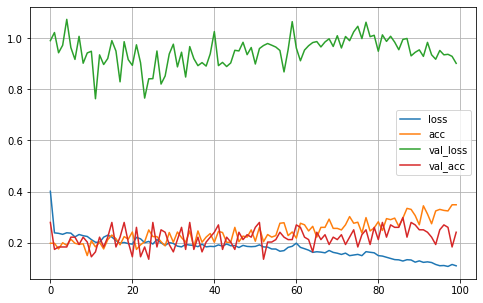

In [218]:
pd.DataFrame(history6.history).plot(figsize=(8, 5))
plt.grid(True)
# plt.gca().set_ylim(0, 0.2)
plt.show()

In [219]:
pred6_raw = model6.predict(X_test)

pred6 = []
for row in pred6_raw:
    pred6.append(row[0])
pred6 = np.array(pred6).reshape(-1,1)

In [227]:
y_test6 = []
for row in y_test:
    y_test6.append(row[0])
y_test6 = np.array(y_test6).reshape(-1,1)
y_test6.shape

(497, 1)

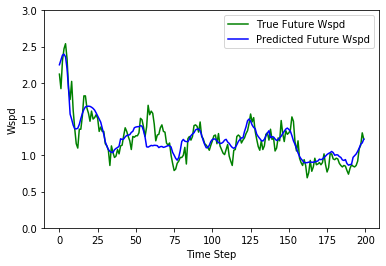

In [238]:
time = [i for i in range(200)]

a = plt.gca()

a.set_ylim([0, 3])
    

plt.plot(time, y_test6[:200], label='True Future Wspd', color='green')
plt.plot(time, pred6[:200], label='Predicted Future Wspd', color='blue')
plt.xlabel('Time Step')
plt.ylabel('Wspd')

plt.legend()

## Use model from new data on old data

### Create Tilt Angle Field for Old Solo Data

### Only Use Roll and Pitch (New) to Train the Model

In [319]:
solo_new = solo_concat.iloc[:,:3]
mavic_new = mavic_concat.iloc[:,:3]
mavic_new_prepared = DataPrepare(np.array(mavic_new), LAG_OBSERVATIONS_SIZE, PREDICT_SIZE)
solo_new_prepared = DataPrepare(np.array(solo_new), LAG_OBSERVATIONS_SIZE, PREDICT_SIZE)

In [334]:
solo_index = int(len(solo_new_prepared) * 0.8)
mavic_index = int(len(mavic_new_prepared) * 0.8)
solo_val = int(solo_index * 0.9)
mavic_val = int(mavic_index * 0.9)

In [335]:
# all data 
X_train_mavic_tmp, X_test_mavic = mavic_new_prepared[:mavic_index], mavic_new_prepared[mavic_index:]
y_train_mavic_tmp, y_test_mavic = wind_mavic_prepared[:mavic_index], wind_mavic_prepared[mavic_index:]

X_train_mavic, X_val_mavic = X_train_mavic_tmp[:mavic_val], X_train_mavic_tmp[mavic_val:]
y_train_mavic, y_val_mavic = y_train_mavic_tmp[:mavic_val], y_train_mavic_tmp[mavic_val:]

X_train_solo_tmp, X_test_solo = solo_new_prepared[:solo_index], solo_new_prepared[solo_index:]
y_train_solo_tmp, y_test_solo = wind_solo_prepared[:solo_index], wind_solo_prepared[solo_index:]

X_train_solo, X_val_solo = X_train_solo_tmp[:solo_val], X_train_solo_tmp[solo_val:]
y_train_solo, y_val_solo = y_train_solo_tmp[:solo_val], y_train_solo_tmp[solo_val:]

In [336]:
numPoints, numFeatures = 40, 3

model7 = tf.keras.models.Sequential()
model7.add(tf.keras.layers.LSTM(256, return_sequences=True, input_shape=(numPoints, numFeatures)))
model7.add(tf.keras.layers.Dropout(rate=0.2))
model7.add(tf.keras.layers.LSTM(128, return_sequences=True))
model7.add(tf.keras.layers.Dropout(rate=0.2))
model7.add(tf.keras.layers.LSTM(64, activation='elu'))
model7.add(tf.keras.layers.Dense(5))

optimizer=tf.keras.optimizers.RMSprop(lr=0.001, rho=0.9)

model7.compile(
        optimizer='adam', 
        loss='mae',
        metrics = ["accuracy"])

In [337]:
history7 = model7.fit(X_train_mavic, y_train_mavic, epochs=100, validation_data = (X_val_mavic, y_val_mavic))

Train on 1364 samples, validate on 152 samples
Epoch 1/100
1364/1364 [==============================] - 18s 13ms/sample - loss: 1.0036 - acc: 0.2449 - val_loss: 0.7305 - val_acc: 0.2500
Epoch 2/100
1364/1364 [==============================] - 17s 12ms/sample - loss: 0.5386 - acc: 0.1826 - val_loss: 0.4469 - val_acc: 0.1842
Epoch 3/100
1364/1364 [==============================] - 17s 13ms/sample - loss: 0.5345 - acc: 0.1957 - val_loss: 0.4337 - val_acc: 0.1776
Epoch 4/100
1364/1364 [==============================] - 17s 13ms/sample - loss: 0.5067 - acc: 0.2060 - val_loss: 0.4205 - val_acc: 0.1513
Epoch 5/100
1364/1364 [==============================] - 17s 13ms/sample - loss: 0.5196 - acc: 0.1943 - val_loss: 0.4213 - val_acc: 0.2500
Epoch 6/100
1364/1364 [==============================] - 17s 13ms/sample - loss: 0.5089 - acc: 0.2038 - val_loss: 0.4610 - val_acc: 0.1579
Epoch 7/100
1364/1364 [==============================] - 17s 13ms/sample - loss: 0.4970 - acc: 0.1957 - val_loss: 0.427

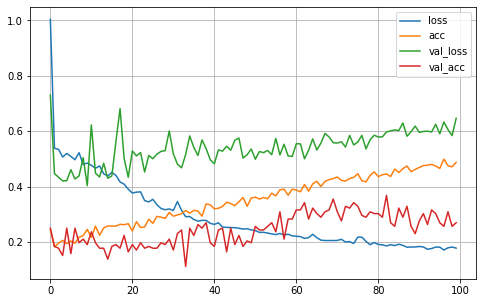

In [348]:
pd.DataFrame(history7.history).plot(figsize=(8, 5))
plt.grid(True)
# plt.gca().set_ylim(0, 0.2)
plt.show()

In [357]:
pred7_raw = model7.predict(X_test)

pred7 = []
for row in pred7_raw:
    pred7.append(row[0])
pred7 = np.array(pred7).reshape(-1,1)

In [358]:
y_test7 = []
for row in y_test:
    y_test7.append(row[0])
y_test7 = np.array(y_test7).reshape(-1,1)
y_test7.shape

(497, 1)

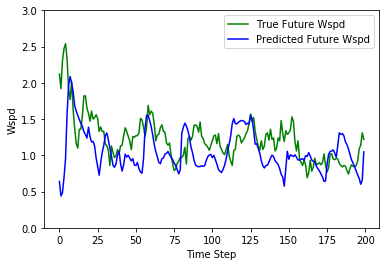

In [372]:
time = [i for i in range(200)]

a = plt.gca()

a.set_ylim([0, 3])
    

plt.plot(time, y_test7[:200], label='True Future Wspd', color='green')
plt.plot(time, pred7[:200], label='Predicted Future Wspd', color='blue')
plt.xlabel('Time Step')
plt.ylabel('Wspd')

plt.legend()

In [365]:
numPoints, numFeatures = 40, 3

model8 = tf.keras.models.Sequential()
model8.add(tf.keras.layers.LSTM(256, return_sequences=True, input_shape=(numPoints, numFeatures)))
model8.add(tf.keras.layers.Dropout(rate=0.2))
model8.add(tf.keras.layers.LSTM(128, return_sequences=True))
model8.add(tf.keras.layers.Dropout(rate=0.2))
model8.add(tf.keras.layers.LSTM(64, activation='elu'))
model8.add(tf.keras.layers.Dense(5))

optimizer=tf.keras.optimizers.RMSprop(lr=0.001, rho=0.9)

model8.compile(
        optimizer='adam', 
        loss='mae',
        metrics = ["accuracy"])

In [366]:
history8 = model8.fit(X_train_solo, y_train_solo, epochs=100, validation_data = (X_val_solo, y_val_solo))

Train on 1963 samples, validate on 219 samples
Epoch 1/100
1963/1963 [==============================] - 27s 14ms/sample - loss: 1.0348 - acc: 0.1803 - val_loss: 0.8138 - val_acc: 0.1644
Epoch 2/100
1963/1963 [==============================] - 26s 13ms/sample - loss: 0.7242 - acc: 0.1737 - val_loss: 0.7073 - val_acc: 0.1553
Epoch 3/100
1963/1963 [==============================] - 27s 14ms/sample - loss: 0.6655 - acc: 0.1966 - val_loss: 0.6792 - val_acc: 0.1598
Epoch 4/100
1963/1963 [==============================] - 27s 14ms/sample - loss: 0.6453 - acc: 0.2211 - val_loss: 0.6905 - val_acc: 0.1644
Epoch 5/100
1963/1963 [==============================] - 27s 14ms/sample - loss: 0.6316 - acc: 0.1783 - val_loss: 0.6544 - val_acc: 0.3288
Epoch 6/100
1963/1963 [==============================] - 27s 14ms/sample - loss: 0.6351 - acc: 0.2140 - val_loss: 0.7338 - val_acc: 0.2374
Epoch 7/100
1963/1963 [==============================] - 27s 14ms/sample - loss: 0.6258 - acc: 0.1997 - val_loss: 0.740

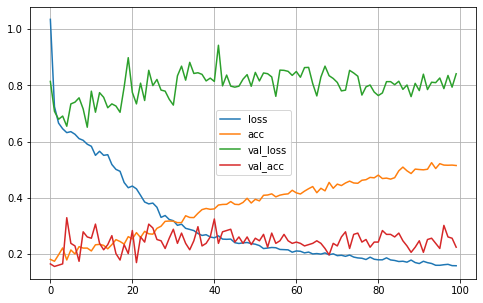

In [367]:
pd.DataFrame(history8.history).plot(figsize=(8, 5))
plt.grid(True)
# plt.gca().set_ylim(0, 0.2)
plt.show()

In [383]:
pred8_raw = model8.predict(X_test)

pred8 = []
for row in pred8_raw:
    pred8.append(row[0])
pred8 = np.array(pred8).reshape(-1,1)

In [370]:
y_test8 = []
for row in y_test:
    y_test8.append(row[0])
y_test8 = np.array(y_test8).reshape(-1,1)
y_test8.shape

(497, 1)

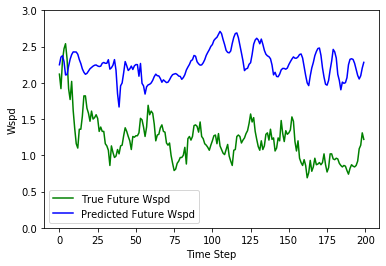

In [371]:
time = [i for i in range(200)]

a = plt.gca()

a.set_ylim([0, 3])
    

plt.plot(time, y_test8[:200], label='True Future Wspd', color='green')
plt.plot(time, pred8[:200], label='Predicted Future Wspd', color='blue')
plt.xlabel('Time Step')
plt.ylabel('Wspd')

plt.legend()

In [374]:
numPoints, numFeatures = 40, 3

model9 = tf.keras.models.Sequential()
model9.add(tf.keras.layers.LSTM(256, return_sequences=True, input_shape=(numPoints, numFeatures)))
model9.add(tf.keras.layers.Dropout(rate=0.2))
model9.add(tf.keras.layers.LSTM(128, return_sequences=True))
model9.add(tf.keras.layers.Dropout(rate=0.2))
model9.add(tf.keras.layers.LSTM(64, activation='elu'))
model9.add(tf.keras.layers.Dense(5))

optimizer=tf.keras.optimizers.RMSprop(lr=0.001, rho=0.9)

model9.compile(
        optimizer='adam', 
        loss='mae',
        metrics = ["accuracy"])

In [375]:
history9 = model9.fit(X_train_mavic, y_train_mavic, epochs=100, validation_data = (X_val_mavic, y_val_mavic))

Train on 1364 samples, validate on 152 samples
Epoch 1/100
1364/1364 [==============================] - 21s 16ms/sample - loss: 1.1441 - acc: 0.2185 - val_loss: 0.5908 - val_acc: 0.2368
Epoch 2/100
1364/1364 [==============================] - 19s 14ms/sample - loss: 0.5300 - acc: 0.1862 - val_loss: 0.4382 - val_acc: 0.2039
Epoch 3/100
1364/1364 [==============================] - 20s 15ms/sample - loss: 0.5231 - acc: 0.1965 - val_loss: 0.4575 - val_acc: 0.1974
Epoch 4/100
1364/1364 [==============================] - 20s 15ms/sample - loss: 0.5194 - acc: 0.1913 - val_loss: 0.4752 - val_acc: 0.1908
Epoch 5/100
1364/1364 [==============================] - 20s 15ms/sample - loss: 0.5190 - acc: 0.1804 - val_loss: 0.6368 - val_acc: 0.2500
Epoch 6/100
1364/1364 [==============================] - 20s 15ms/sample - loss: 0.4941 - acc: 0.1987 - val_loss: 0.4450 - val_acc: 0.1645
Epoch 7/100
1364/1364 [==============================] - 21s 15ms/sample - loss: 0.4895 - acc: 0.2170 - val_loss: 0.597

In [376]:
history9 = model9.fit(X_train_solo, y_train_solo, epochs=100, validation_data = (X_val_solo, y_val_solo))

Train on 1963 samples, validate on 219 samples
Epoch 1/100
1963/1963 [==============================] - 30s 15ms/sample - loss: 0.6646 - acc: 0.2420 - val_loss: 0.6944 - val_acc: 0.1826
Epoch 2/100
1963/1963 [==============================] - 191s 98ms/sample - loss: 0.5423 - acc: 0.2384 - val_loss: 0.7431 - val_acc: 0.2511
Epoch 3/100
1963/1963 [==============================] - 30s 15ms/sample - loss: 0.4849 - acc: 0.2746 - val_loss: 0.7952 - val_acc: 0.2146
Epoch 4/100
1963/1963 [==============================] - 30s 15ms/sample - loss: 0.4556 - acc: 0.2766 - val_loss: 0.6559 - val_acc: 0.2694
Epoch 5/100
1963/1963 [==============================] - 29s 15ms/sample - loss: 0.3993 - acc: 0.3031 - val_loss: 0.6770 - val_acc: 0.2785
Epoch 6/100
1963/1963 [==============================] - 29s 15ms/sample - loss: 0.3724 - acc: 0.3062 - val_loss: 0.6997 - val_acc: 0.1918
Epoch 7/100
1963/1963 [==============================] - 29s 15ms/sample - loss: 0.3510 - acc: 0.3128 - val_loss: 0.72

In [377]:
history9 = model9.fit(X_train, y_train, epochs=100, validation_data = (X_val, y_val))

Train on 934 samples, validate on 104 samples
Epoch 1/100
934/934 [==============================] - 14s 15ms/sample - loss: 0.6454 - acc: 0.2120 - val_loss: 0.8571 - val_acc: 0.2404
Epoch 2/100
934/934 [==============================] - 14s 15ms/sample - loss: 0.5313 - acc: 0.2473 - val_loss: 0.6491 - val_acc: 0.2404
Epoch 3/100
934/934 [==============================] - 14s 15ms/sample - loss: 0.5566 - acc: 0.2495 - val_loss: 0.4521 - val_acc: 0.2404
Epoch 4/100
934/934 [==============================] - 14s 15ms/sample - loss: 0.4090 - acc: 0.3009 - val_loss: 0.6601 - val_acc: 0.1635
Epoch 5/100
934/934 [==============================] - 14s 15ms/sample - loss: 0.3590 - acc: 0.3201 - val_loss: 0.8531 - val_acc: 0.2500
Epoch 6/100
934/934 [==============================] - 14s 15ms/sample - loss: 0.3158 - acc: 0.3298 - val_loss: 0.6645 - val_acc: 0.2404
Epoch 7/100
934/934 [==============================] - 14s 15ms/sample - loss: 0.3029 - acc: 0.3555 - val_loss: 0.7356 - val_acc: 0.

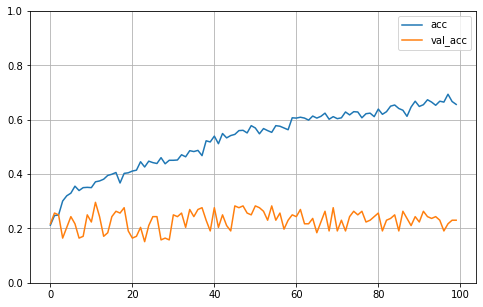

In [422]:
acc = pd.DataFrame(history2.history['acc'], columns=['acc'])
val_acc = pd.DataFrame(history2.history['val_acc'], columns=['val_acc'])
acc_con = pd.concat([acc, val_acc])
acc_con.plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

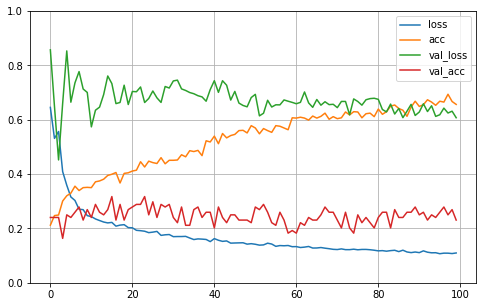

In [423]:
acc = pd.DataFrame(history9.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [386]:
pred9_raw = model9.predict(X_test)

pred9= []
for row in pred9_raw:
    pred9.append(row[0])
pred9= np.array(pred9).reshape(-1, 1)

In [387]:
y_test9 = []
for row in y_test:
    y_test9.append(row[0])
y_test9 = np.array(y_test9).reshape(-1,1)
y_test9.shape

(497, 1)

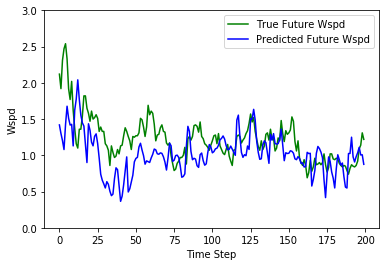

In [388]:
time = [i for i in range(200)]

a = plt.gca()

a.set_ylim([0, 3])
    

plt.plot(time, y_test9[:200], label='True Future Wspd', color='green')
plt.plot(time, pred9[:200], label='Predicted Future Wspd', color='blue')
plt.xlabel('Time Step')
plt.ylabel('Wspd')

plt.legend()

In [398]:
pred9_mavic_raw = model9.predict(X_test_mavic)

pred9_mavic= []
for row in pred9_mavic_raw:
    pred9_mavic.append(row[0])
pred9_mavic= np.array(pred9_mavic).reshape(-1, 1)

In [400]:
pred9_mavic.shape

(379, 1)

In [401]:
y_test9_mavic = []
for row in y_test_mavic:
    y_test9_mavic.append(row[0])
y_test9_mavic = np.array(y_test9_mavic).reshape(-1,1)
y_test9_mavic.shape

(379, 1)

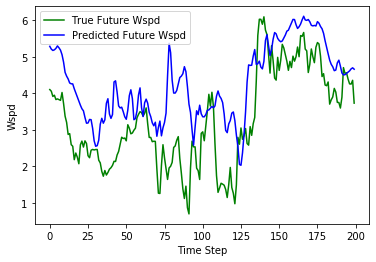

In [403]:
time = [i for i in range(200)]

a = plt.gca()

# a.set_ylim([0, 3])
    

plt.plot(time, y_test9_mavic[:200], label='True Future Wspd', color='green')
plt.plot(time, pred9_mavic[:200], label='Predicted Future Wspd', color='blue')
plt.xlabel('Time Step')
plt.ylabel('Wspd')

plt.legend()

In [404]:
pred9_solo_raw = model9.predict(X_test_solo)

pred9_solo= []
for row in pred9_solo_raw:
    pred9_solo.append(row[0])
pred9_solo = np.array(pred9_solo).reshape(-1, 1)

In [406]:
pred9_solo.shape

(546, 1)

In [405]:
y_test9_solo = []
for row in y_test_solo:
    y_test9_solo.append(row[0])
y_test9_solo = np.array(y_test9_solo).reshape(-1,1)
y_test9_solo.shape

(546, 1)

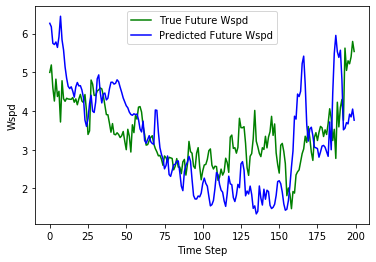

In [407]:
time = [i for i in range(200)]

a = plt.gca()

# a.set_ylim([0, 3])
    

plt.plot(time, y_test9_solo[:200], label='True Future Wspd', color='green')
plt.plot(time, pred9_solo[:200], label='Predicted Future Wspd', color='blue')
plt.xlabel('Time Step')
plt.ylabel('Wspd')

plt.legend()

In [424]:
find_tilt_angle(solo_concat.iloc[:,0], solo_concat.iloc[:,1])

0       1.841581
1       1.819402
2       1.960513
3       1.690682
4       2.276234
          ...   
2767    1.685909
2768    1.706620
2769    1.763397
2770    1.720027
2771    2.045163
Length: 2772, dtype: float64

In [425]:
solo_concat

,solo_roll,solo_pitch,solo_tilt,solo_acc_x,solo_acc_y
0,4.980000,-0.060000,1.841581,0.264165,-0.579805
1,4.566667,1.333333,1.826035,0.362055,-0.597630
2,5.635000,2.180000,2.005630,0.373758,-0.748031
3,2.523333,1.913333,1.699379,0.383708,-0.541033
4,7.585000,3.195000,2.278084,0.346282,-0.583519
...,...,...,...,...,...
2767,2.036667,2.326667,1.690299,0.603815,-0.316865
2768,1.645000,2.980000,1.713398,0.498798,-0.429512
2769,3.603333,2.040000,1.765061,0.565965,-0.460122
2770,2.910000,2.105000,1.722425,0.337627,-0.437382
